<a href="https://colab.research.google.com/github/MarcoLe3/Colab-Demo/blob/main/GenAI_Pytorch_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

We assume you are already familiar with
1.   Python3
      *   if-else, loops, functions, file inp/out, classes
      *   Have atlease basic familiarity with pandas / numpy.
      *   Understanding how to install and use packages
      *   In case you had like to refresh: [Python W3Schools](https://www.w3schools.com/python/)

2.   Deep Learning Basics
      *   Understand the concept of training vs testing.
      *   What a model is (input → output).
      *   Idea of a loss function and why we minimize it.
      *   Very basic knowledge of gradient descent is a plus.
      *   In case you had like to refresh: [Google ML Intro](https://developers.google.com/machine-learning/intro-to-ml)
      


# Goal of this tutorial

*   First, we will understand on a conceptual high level -> Pytorch, nueral network, tensor basics and related industry jargon.
*   Then we will practically implement a small image classifier model live and understand how pytorch libraries and methods are used.

 ### Video Lab


*   For easier follow through, everything I share / speak in the video has been mentioned in this file. I have tried my best to not deviate away from the script and if I add anything extra that you need to clarify please reach out on email **ntaneja@sfsu.edu**
*   Ensure that everyone has this google collab notebook to follow through.


# Machine Learning Basics

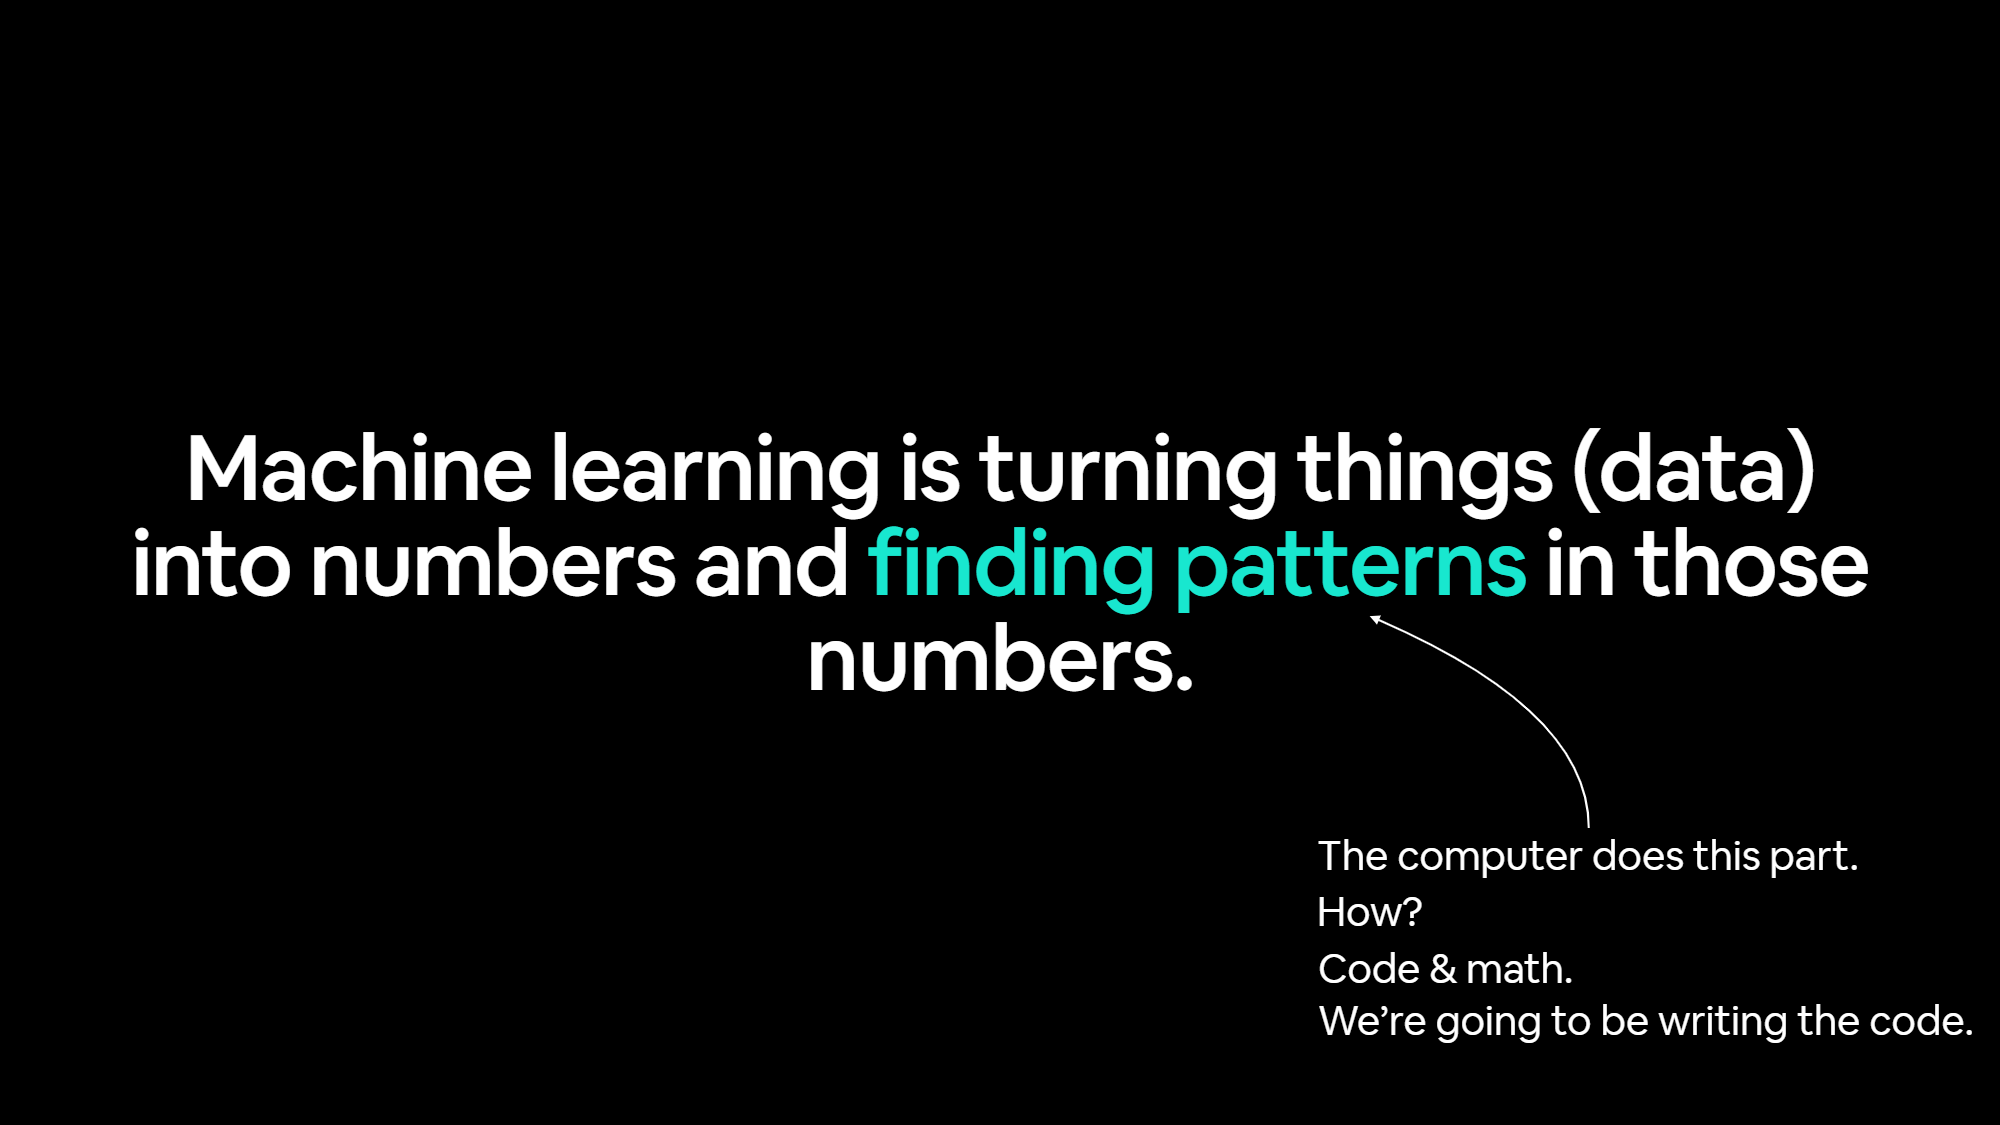

## What is Deep Learning

Broadly, Deep learning is a subset of ML that uses a combination of algorithms and data structures called neural networks to learn patterns from unstructured data. For example, you can use deep learning to describe images, translate documents, or transcribe a sound file into text.

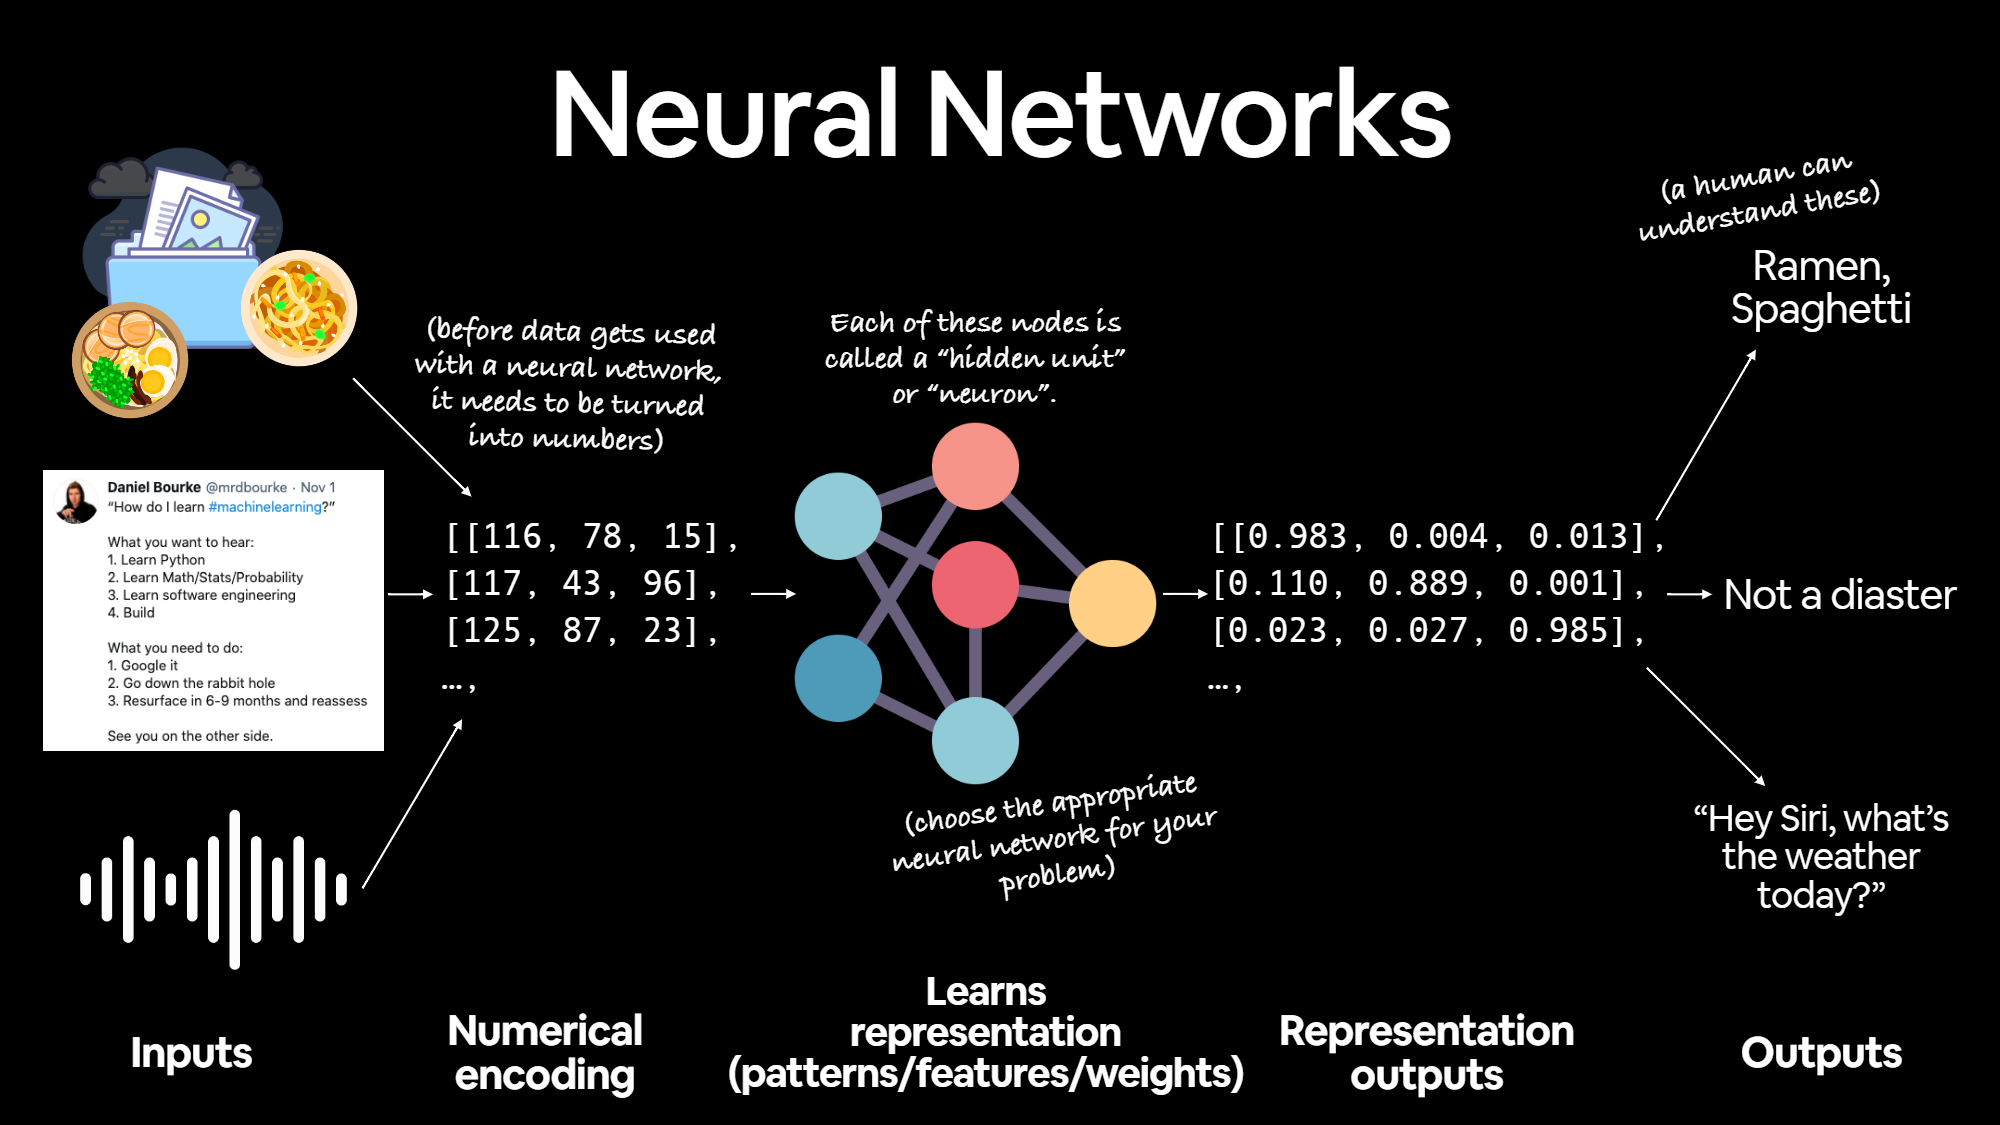

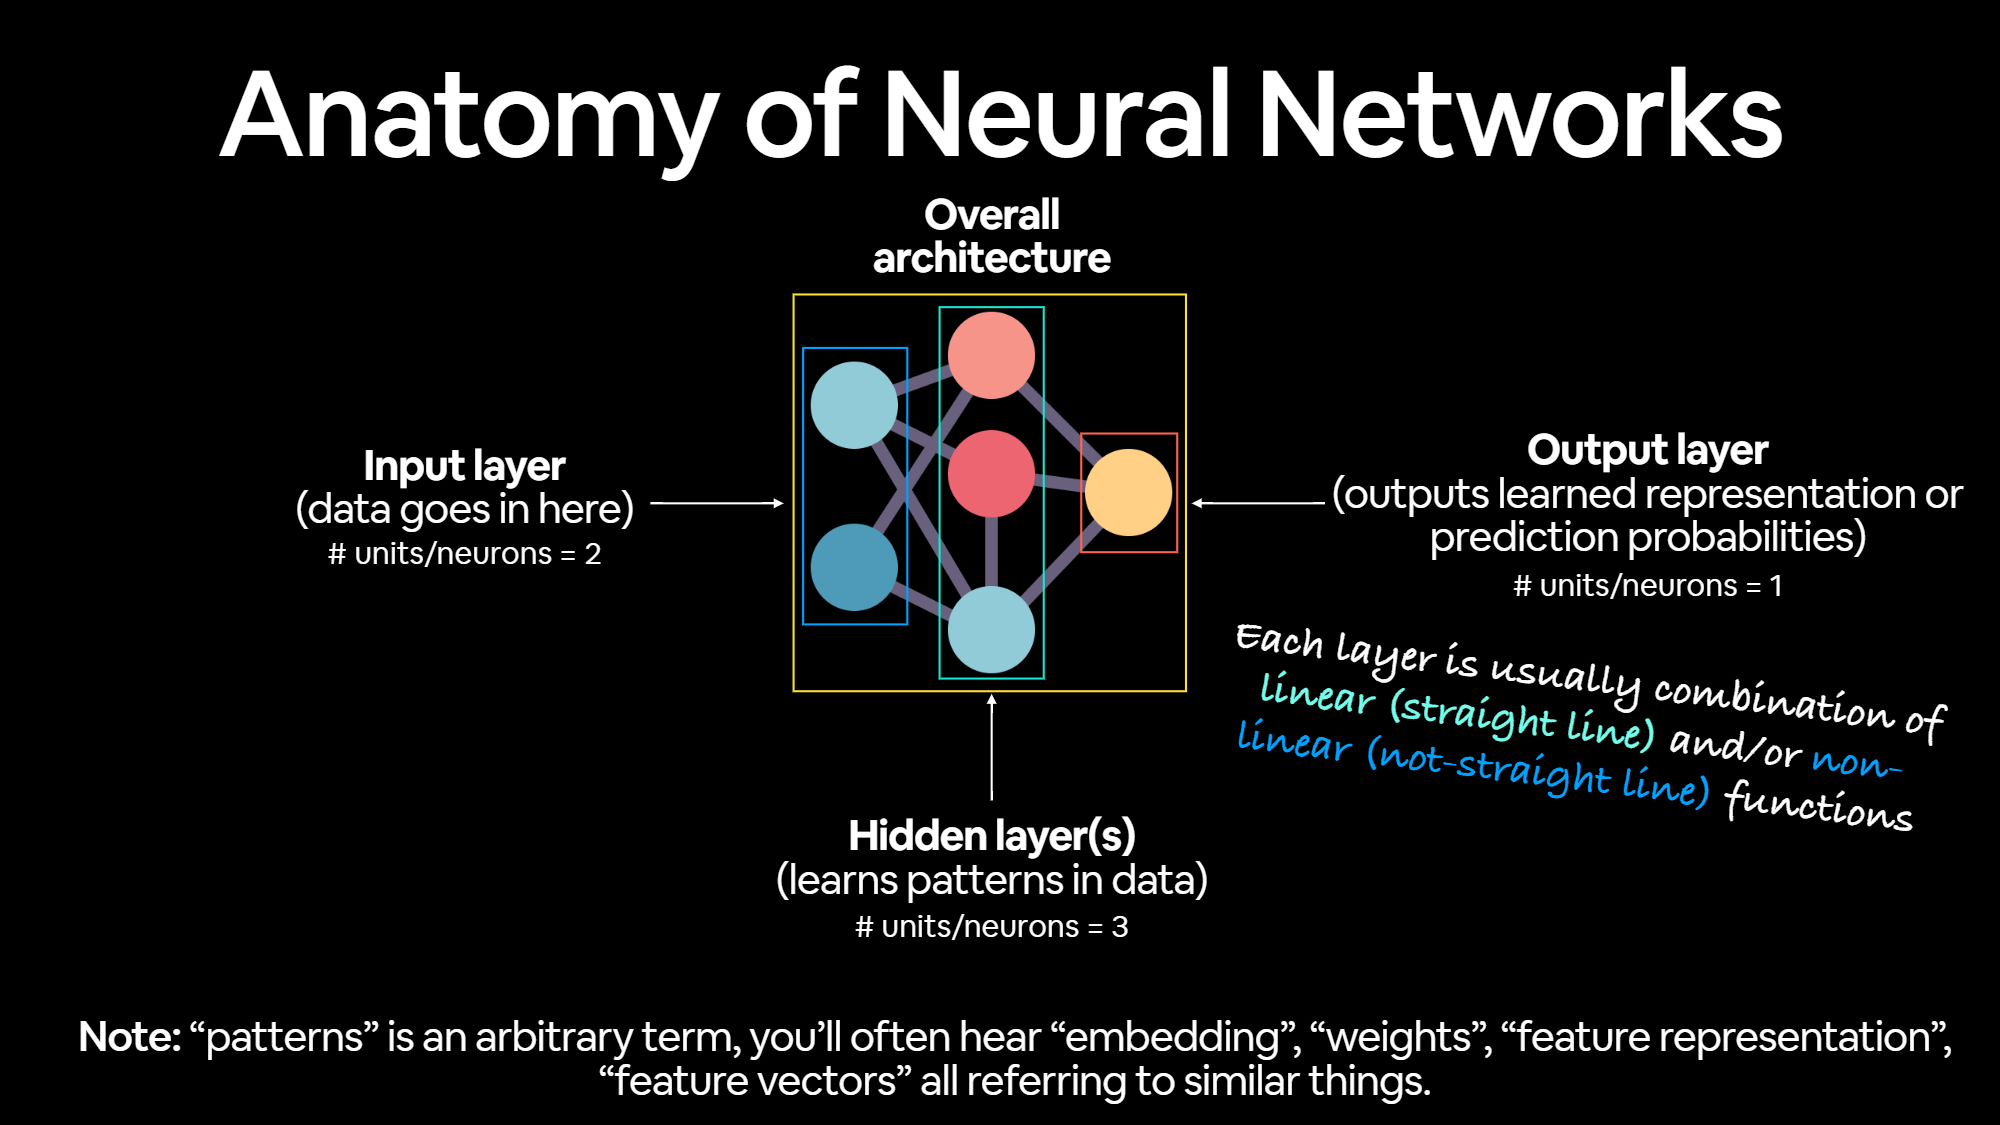

Before we dive into Pytorch and framework how training works, let’s first understand what a neural network is.

A neural network is simply a collection of nodes, also called neurons, connected together in layers. It is inspired by how the human brain works, but it’s a much simpler mathematical version.

On the left, we have the input layer, which represents our raw data features, for example pixels of an image or numbers in a dataset.

In the middle, we have hidden layers. These are the processing steps where the network combines inputs, applies weights, biases, and non-linear functions. This is where the network learns to recognize patterns like shapes, words, or trends.

Finally, on the right, we have the output layer. This layer gives us the final prediction — for example, ‘spaghetti vs ramen’ in food image classification, or a numerical prediction in regression.

The most important thing to understand is: the network learns by adjusting the strengths of the connections — called weights — between these nodes. That’s what training is all about.

# Who created Pytorch? What is Pytorch? Why choose Pytorch?

In 2016 Facebook AI Research team was experimenting heavily with deep learning. As deep learning models (CNNs, RNNs, later Transformers) became more complex, researchers needed:


*   A flexible, dynamic system to prototype quickly.
*   Seamless GPU acceleration.
*   Automatic differentiation (no one wanted to hand-code gradients).

None of the existing frameworks covered these nuances, So they created Pytorch. It was designed specifically to make deep learning easier to experiment with and scale. By Jan2020, it was so well adopted that OpenAI, declared they will be building most models on Pytorch as their deep learning framework. [Link](https://openai.com/index/openai-pytorch/)

What is PyTorch?
*   PyTorch is a Python-based scientific computing package serving two broad purposes:
    *   A replacement for NumPy to use the power of GPUs and other accelerators. N-dimensional Tensor computation (like NumPy) on GPUs and other accelerators
    *  An automatic differentiation library that is useful to implement neural networks.

Why use PyTorch?
*   `Easy & Pythonic` → fast to prototype, debug, and learn
*   Backed by strong community & research momentum.
*   Used by leading companies: Meta, Microsoft, Tesla, OpenAI, DeepMind, Hugging Face, Amazon, NVIDIA    
*   Scales to production (CUDA, distributed, mobile, ONNX)

> Key Takeaway: Build ideas quickly, train efficiently, and ship reliably—all in Python.



# Tensors

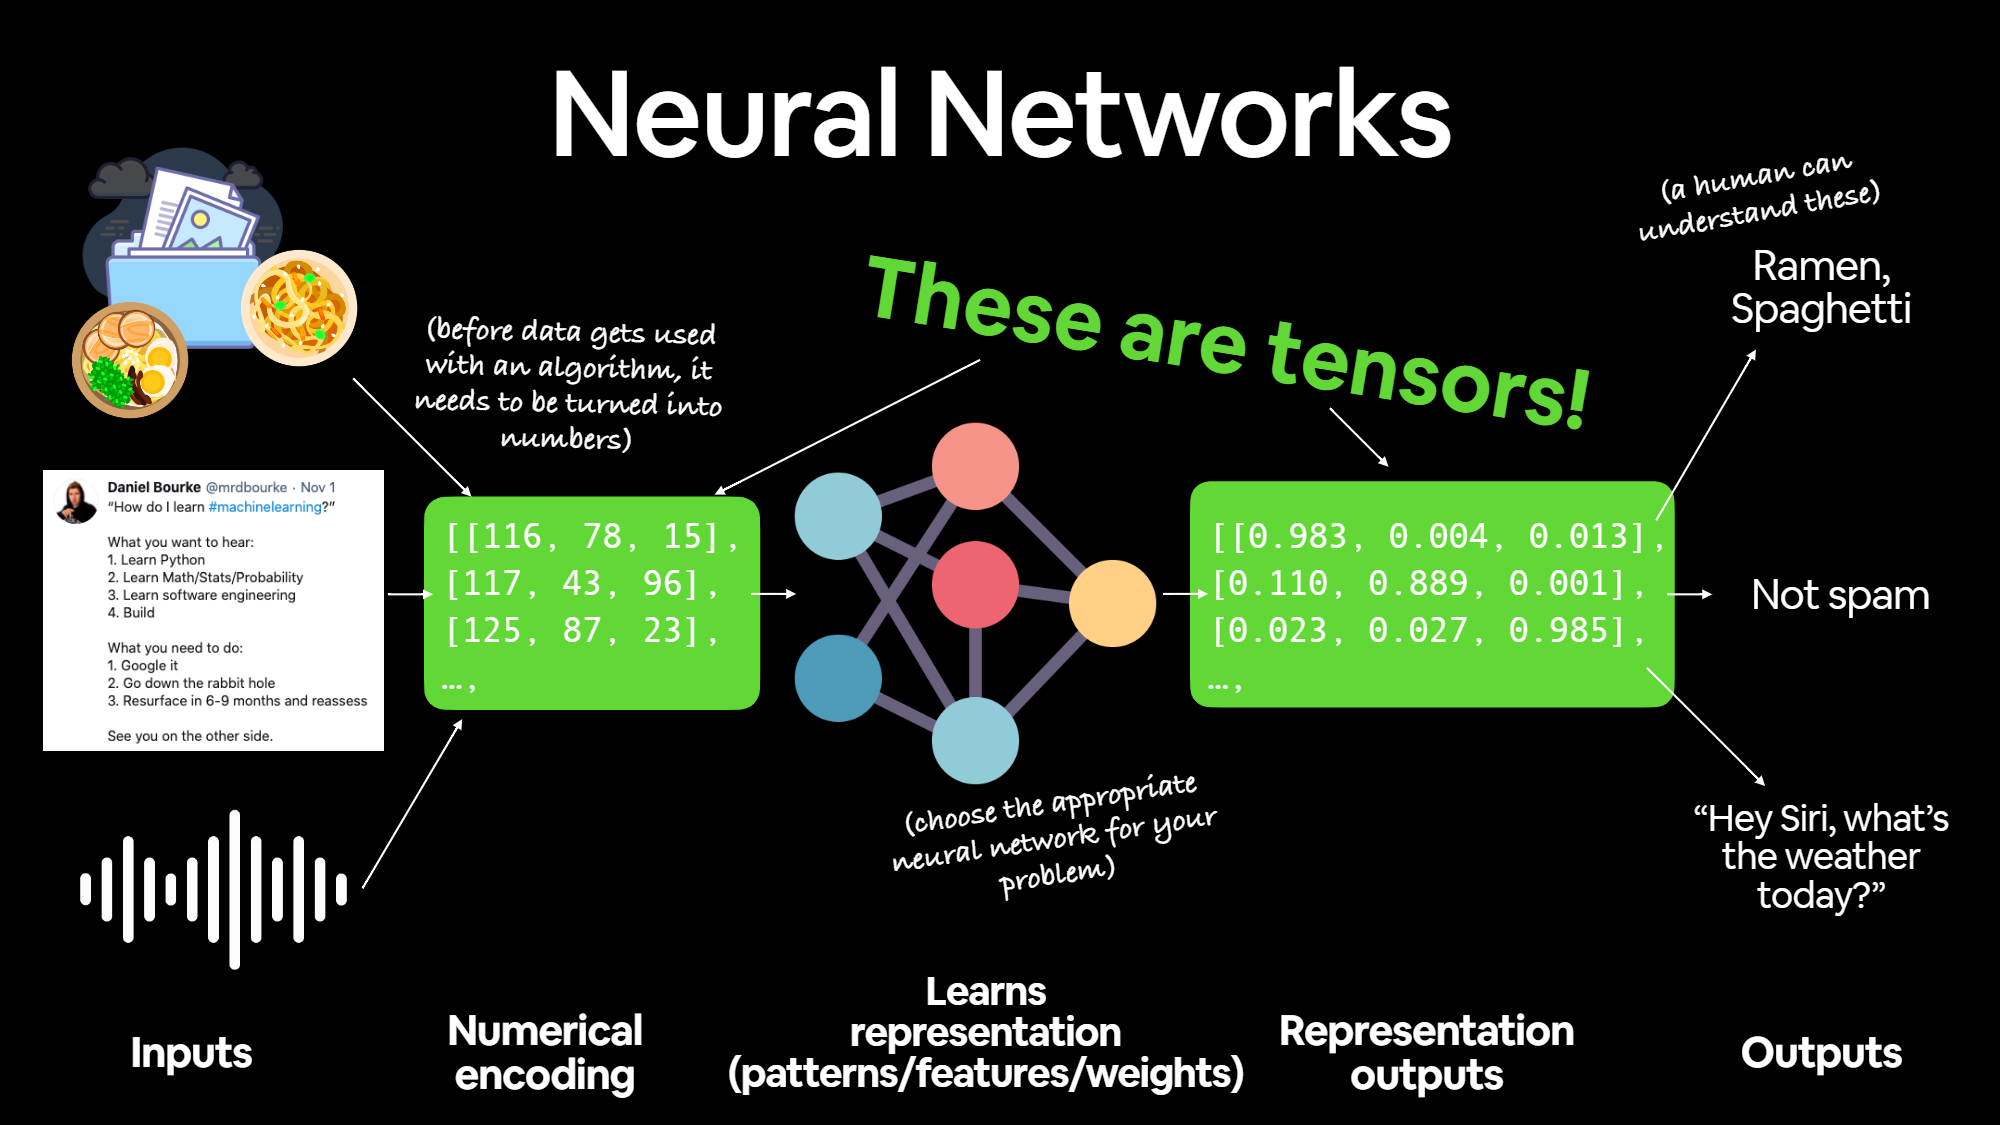

### **Common questions!**
1. **How are tensors different from numpy or matrices?**
*   Tensors are basically arrays and matrices that can be extended to N dimensions.


**0D Tensor** = Scalar = 5,

**1D Tensor** = Array =
`[1,2,3,4,5] `

**2D Tensor** = Matrix
```
[[1, 2, 3],
[4, 5, 6]]
```

**Tensor(3D)** = Stack of Matrices
```
[
  [ [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9] ],

  [ [10, 11, 12],
    [13, 14, 15],
    [16, 17, 18] ]
]
```
**Real-Life Examples**
*   3D tensor: a colored image (height × width × channels).
*   4D tensor: a batch of images (batch × height × width × channels)





2. **Why cant we use numpy or other data structures with GPU?**

*   Numpy module under the hood use C/Fortran libraries that are optimised for CPUs(no built in way to talk to GPU), where as Pytorch Tensors can run both on CPUs and are also optimised for running on GPUs for parallel processing. Under the hood big tensor operations are split into thousands of parallel jobs.
*   In addition, this data structure extensively supports automatic differentiation. An operation we use almost everywhere in optimising deep learning models.   


3. **Difference between GPU processing and CPU processing.**


*   CPUs: few cores (4–16 typically), optimized for sequential tasks.
*   GPUs: thousands of smaller cores, optimized for parallel tasks (like multiplying all pixels in an image at once).
*   Tensor operations (matrix multiplication, convolution, addition) are embarrassingly parallel → GPUs crush them

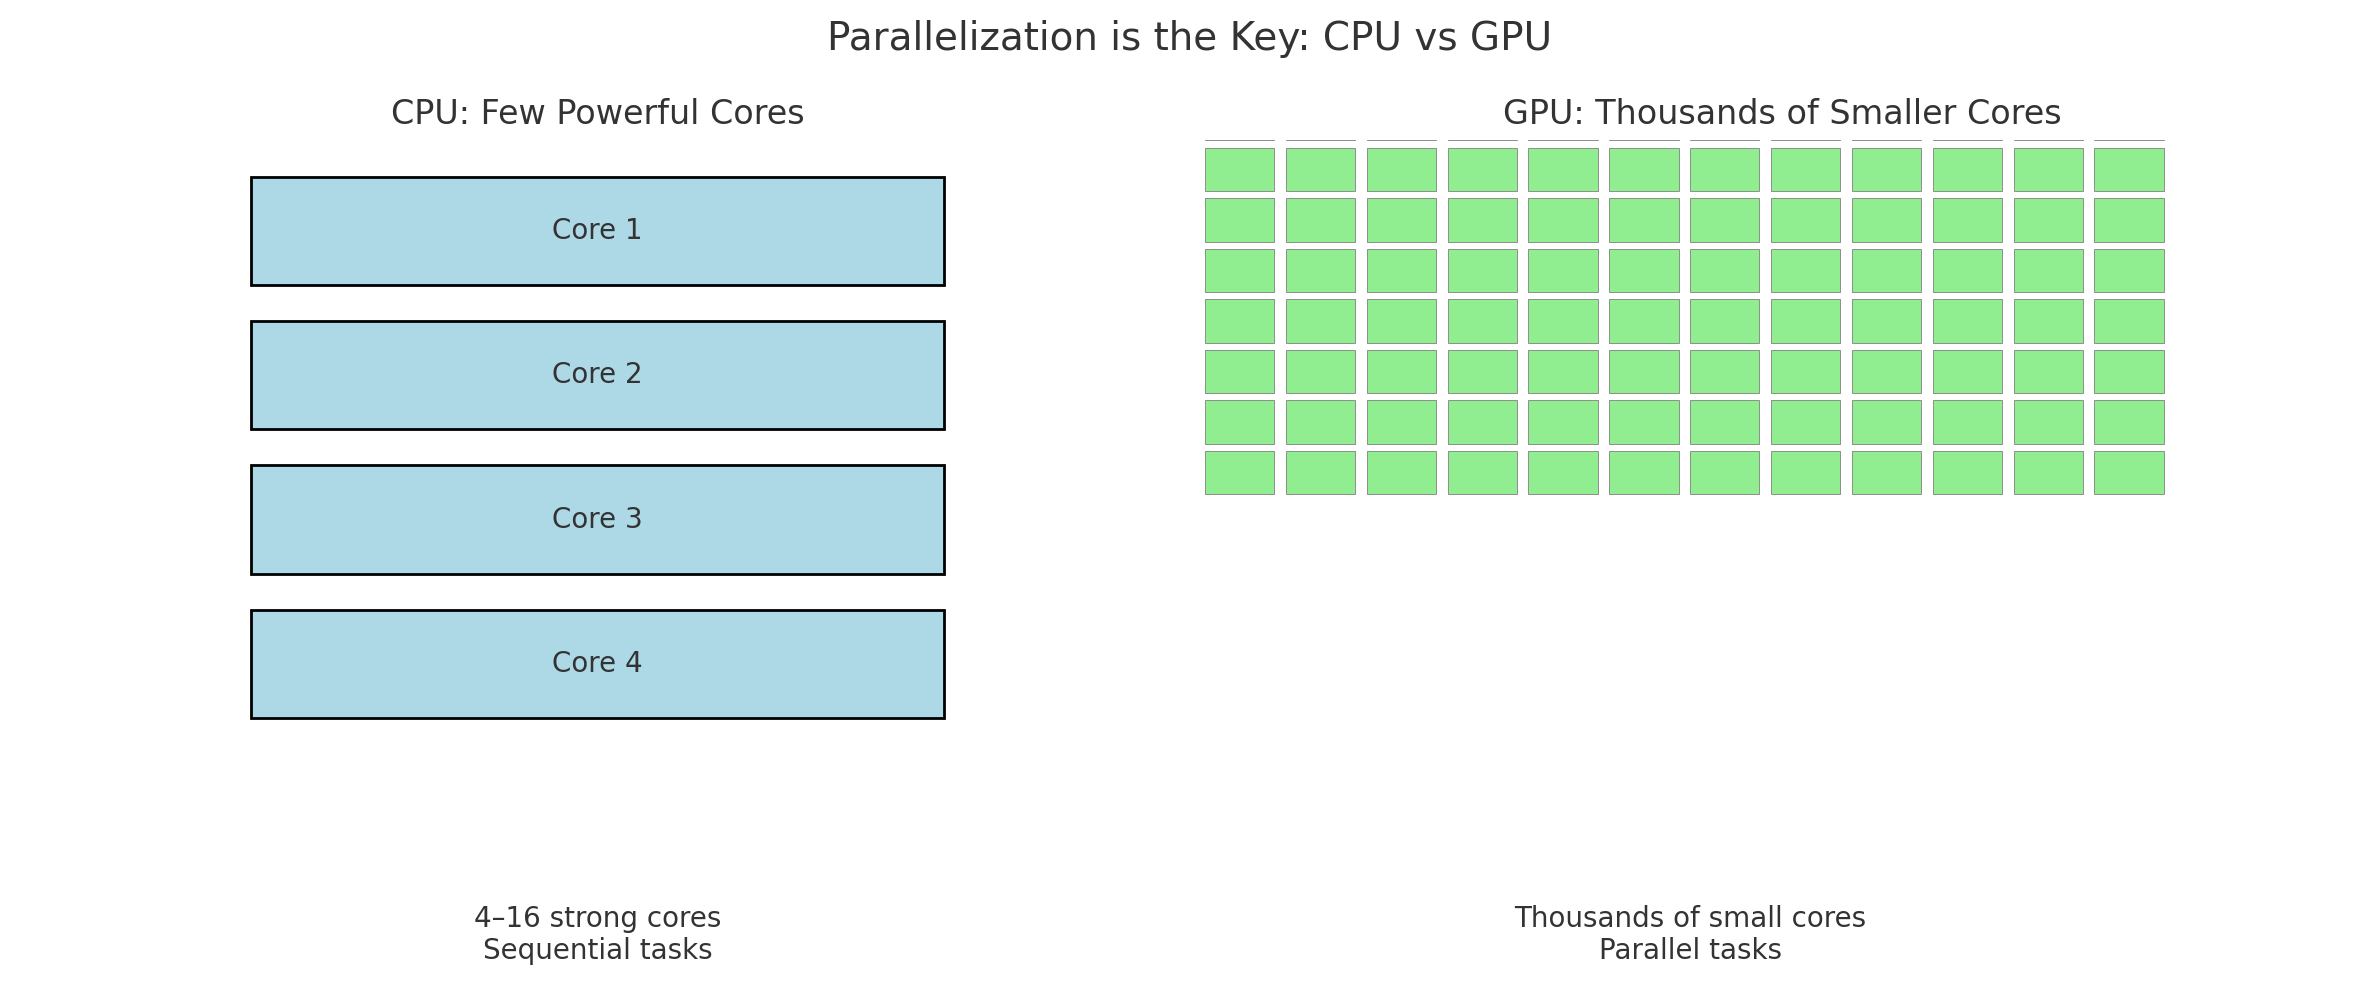

CPU = A few expert chefs cooking a fancy meal course by course.

GPU = Thousands of cooks making sandwiches at the same time.

**Tensor operations = making sandwiches → every sandwich is independent**

[Nvidia Sep 2008 GPU vs CPU Mythbusters](https://www.youtube.com/watch?v=Ge-g3xZ5bb8) Do note, that this video is of **2008**, when Nvidia was trying to push GPUs mainstream and paid Mythbusters to conduct a demo like this. Just FYI, if you ever wondered why Nvidia is a Trillion $$$ company.

# Training Neural Networks

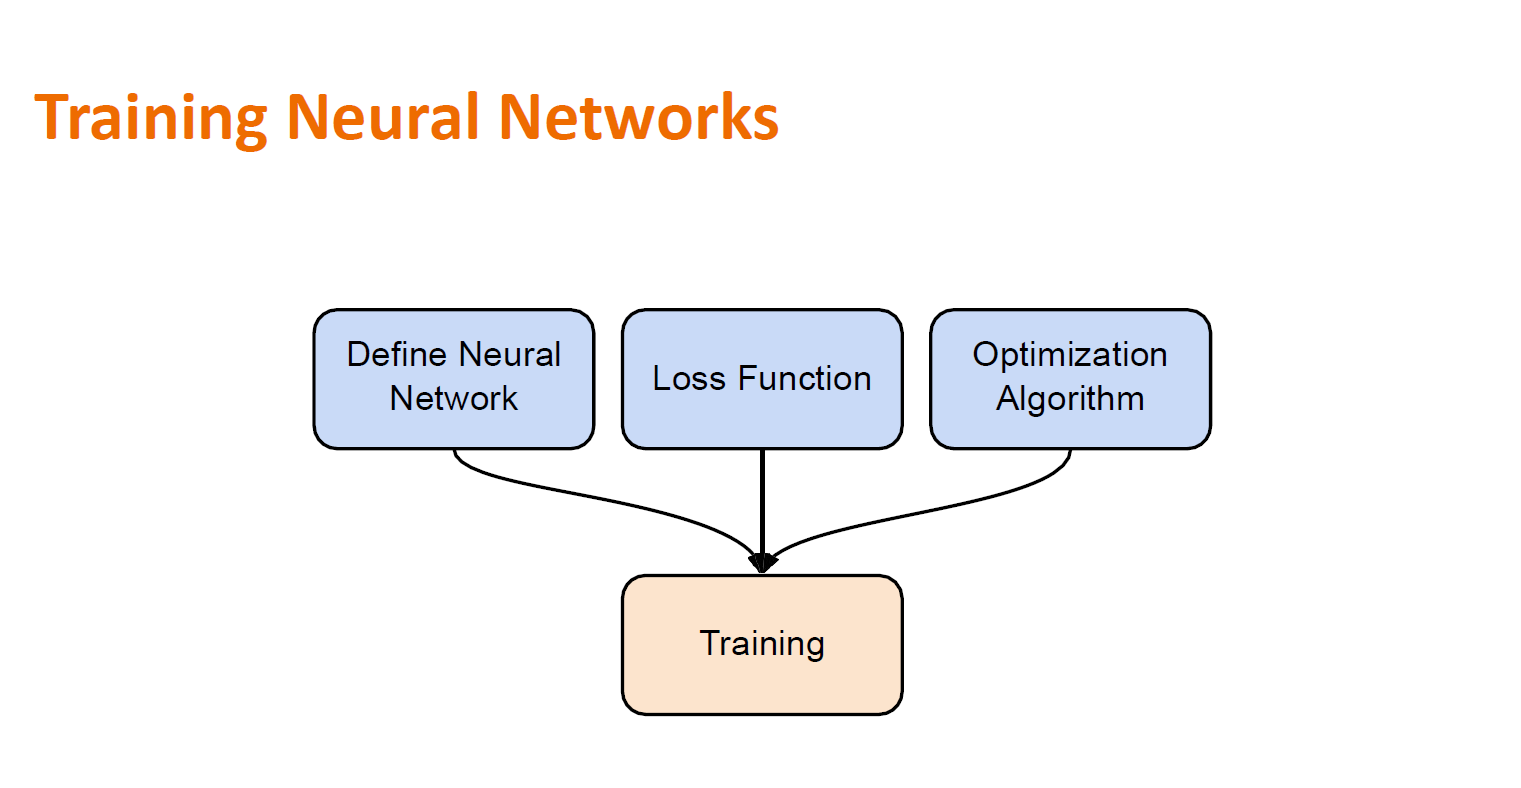

**Training a neural network has three main ingredients:**


1.   First, we define the model — this is the neural network, the architecture that makes predictions.
2.   Second, we choose a loss function — this tells us how far off our predictions are from the true answers.
2.   Third, we pick an optimizer — this decides how the model should adjust its weights to get better.

**These three come together in the training loop. In each step:**


*   The model makes a prediction (forward pass).
*   We calculate the loss to see how wrong it was.
*   PyTorch’s autograd computes gradients automatically (backward pass).
*   The optimizer uses those gradients to update the weights a little bit.

**We repeat this loop many times until the network learns. This cycle is the heart of deep learning training.**

# Train Test and Validation Sets

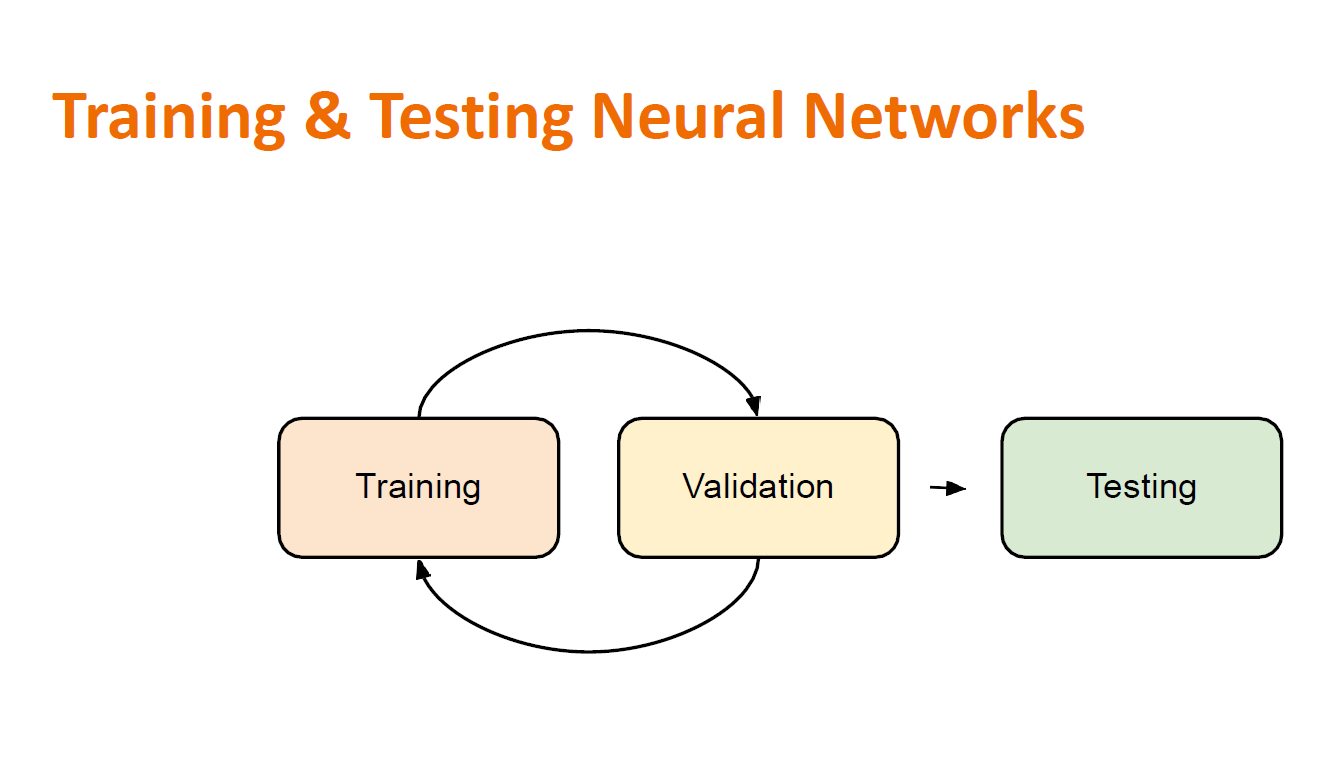

**When we develop a neural network, we don’t just train it once and call it done.** **We split the data into three sets: training, validation, and testing.**

**The training set** is what the model learns from — this is where weights are updated. But if we only relied on training, the model might memorize instead of generalizing.

So we also use **a validation set**. After each training cycle, we check performance on validation data. This helps us tune things like learning rate, number of layers, and prevents overfitting. That’s why you see training and validation working back and forth together.

Finally, once we’re satisfied, we bring in the **testing set**. This is fresh, unseen data that gives us an honest evaluation of how well the trained model will perform in the real world. Notice there’s no arrow back — testing is not for improvement, only for reporting final performance.

# Implementation

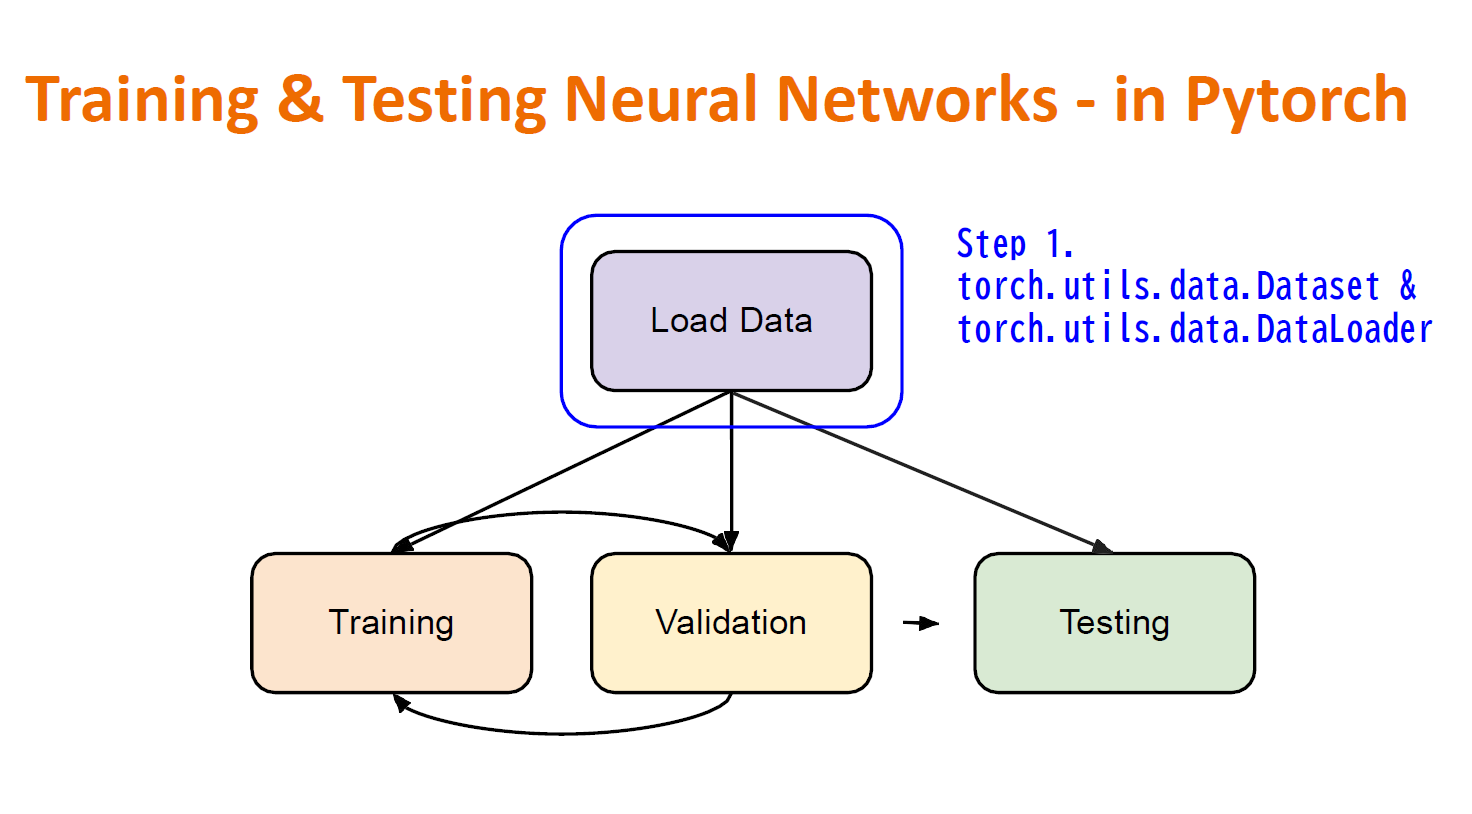

# Dataset & Dataloader



PyTorch has two primitives to work with data:
**torch.utils.data.DataLoader and torch.utils.data.Dataset.**

**Dataset** stores the samples and their corresponding labels

**DataLoader** wraps an iterable around the Dataset

**PyTorch offers domain-specific libraries** such as **TorchText, TorchVision, and TorchAudio**, all of which include datasets. For this tutorial, we will be using a TorchVision dataset.

The torchvision.datasets module contains Dataset objects for many real-world vision data like CIFAR, COCO (full list here). Here, we use the **FashionMNIST dataset.**

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# Download training data from open datasets.

#datasets.FashionMNIST() -> This function from the torchvision.datasets module is used to access the FashionMNIST dataset.
training_data = datasets.FashionMNIST(
    root="data", # root="data": Specifies the directory where the dataset will be downloaded and stored.
    train=True, # train=True: Downloads the training set of the dataset
    download=True, # download=True: If the dataset is not already present in the root directory, it will be downloaded.
    transform=ToTensor(),
    # transform=ToTensor(): Converts the images from the dataset into PyTorch tensors. This is necessary because PyTorch models work with tensors.
    # In essence, this code prepares the training and testing data by downloading it and converting it into a format that can be used by a PyTorch model
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # train=False: Downloads the test set of the dataset.
    download=True,
    transform=ToTensor(),
)

Now we pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Here, each time you iterate over train_loader, it yields a batch of 64 samples.
# Those 64 samples are stacked together into tensors for efficient parallel processing on CPU/GPU."""

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

# The for loop iterates through the test_dataloader to show the shape of the data and labels in a single batch.
#    X represents a batch of images (features). The shape [N, C, H, W] indicates:
#   N: the batch size (number of images in the batch)
#    C: the number of channels (e.g., 1 for grayscale, 3 for RGB)
#    H: the height of the images
#    W: the width of the images
#   y represents a batch of labels for the images. The shape [N] indicates the batch size.

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


 ## Why Batch Size Matters

**Small batch size (e.g., 16, 32):**

Faster per update, less memory usage.

But updates are noisy (more variance in gradients).

**Large batch size (e.g., 512, 1024):**

Smoother updates (gradients closer to true average).

But requires more memory, and may converge slower in terms of generalization.

Common practice: Start with 32 or 64 and tune depending on GPU memory and dataset size.


Analogy: Think of training like studying for an exam:

**Batch size** = how many practice problems you solve before checking the answer key and adjusting your strategy.

**Small batch** = check answers often (faster feedback, but noisy).

**Large batch** = do many problems before checking (smoother feedback, but heavy workload).

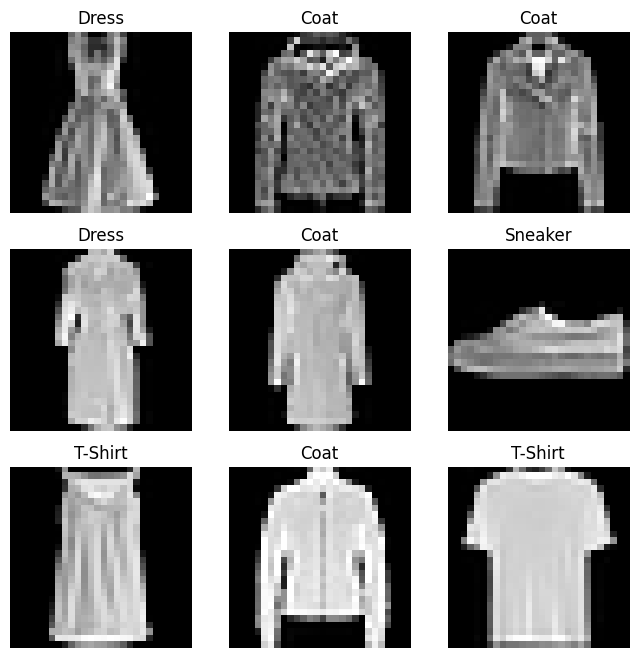

In [ ]:
import matplotlib.pyplot as plt
# labels_map creates a dictionary mapping numeric labels (0–9) from the FashionMNIST dataset to human-readable class names.
# Example: if the dataset gives label 7, it means "Sneaker"
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # Randomly picks an index from the training dataset.
    img, label = training_data[sample_idx] # Retrieves the corresponding image (img) and label (label).
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Creating custom data set

 A custom Dataset class must implement three functions: __init__, __len__, and __getitem__.


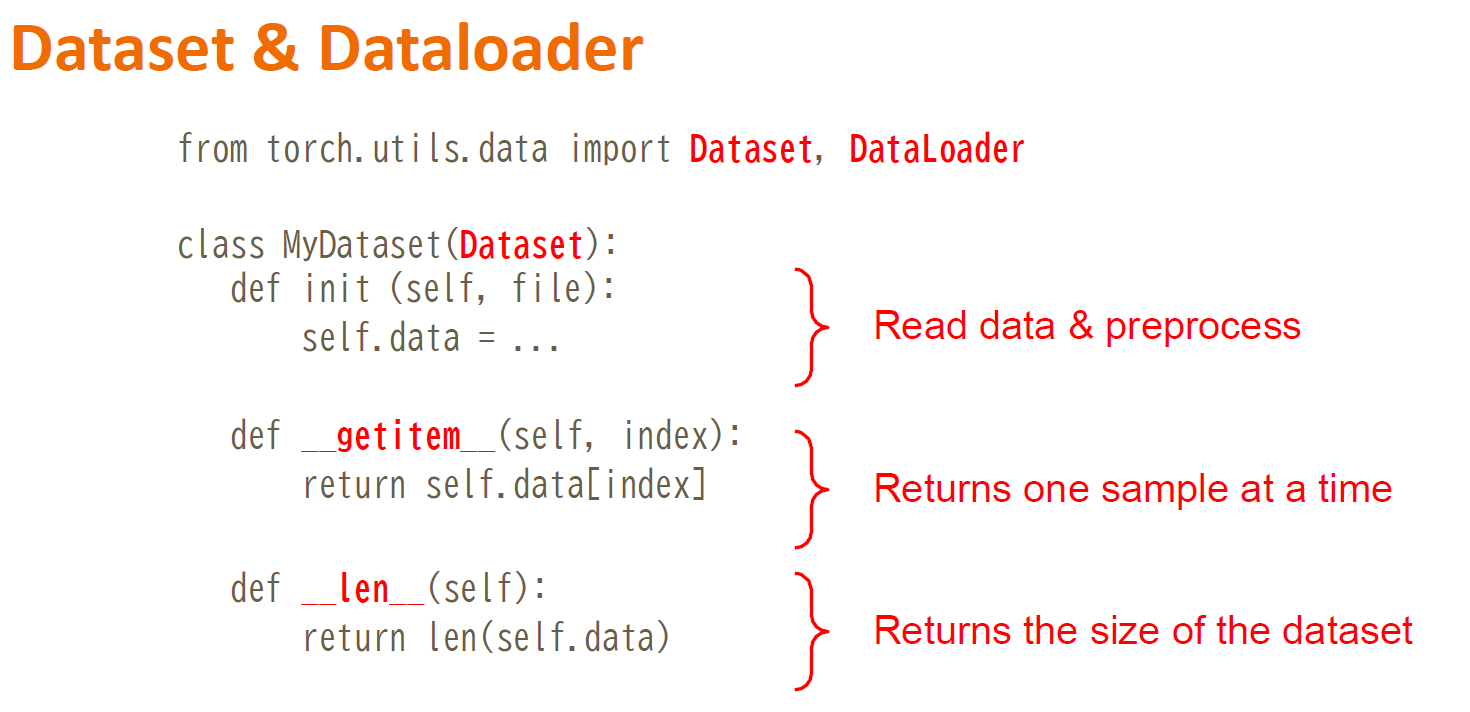

## Custom dataset / dataloader code
*(self read - elaborate if time permits)

For reference, below is the custom dataset / dataloader code for same FashionMist dataset. Assume the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotations_file Follow this when sourcing your own datasets.

The annotation file -> labels.csv looks like:

```
tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9
```



In [ ]:
# #do not run below code standalone, it needs images and annotations stored seperately. This is just for reference.
# import os
# import pandas as pd
# from torchvision.io import decode_image

# class CustomImageDataset(Dataset):

#   """The __init__ function is run once when instantiating the Dataset object.
#    We initialize the directory containing the images, the annotations file, and both transforms (covered in more detail in the next section).
#   The labels.csv file looks like:"""

#   def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#       self.img_labels = pd.read_csv(annotations_file)
#       self.img_dir = img_dir
#       self.transform = transform
#       self.target_transform = target_transform

#   def __len__(self):

#     """The __len__ function returns the number of samples in our dataset."""

#     return len(self.img_labels)

#   def __getitem__(self, idx):

#     """The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index,
#     it identifies the image’s location on disk, converts that to a tensor using decode_image,
#     retrieves the corresponding label from the csv data in self.img_labels,
#      calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple."""

#     img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#     image = decode_image(img_path)
#     label = self.img_labels.iloc[idx, 1]
#     if self.transform:
#         image = self.transform(image)
#     if self.target_transform:
#         label = self.target_transform(label)
#     return image, label

Wrapping dataset into dataloader for iteration

```
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)
```



# Shuffle property of dataloader

In PyTorch’s DataLoader, the argument shuffle controls whether the dataset is reshuffled at every epoch.


train_dataloader = DataLoader(training_data, batch_size=64, ***shuffle=True***)

test_dataloader = DataLoader(test_data, batch_size=64, ***shuffle=False***)

**Why do we shuffle?**


*   **Breaks ordering bias.** -If your dataset is ordered by class (e.g., all cats first, then all dogs), feeding it in order would make training unstable.
*   **Better generalization**- Randomizing inputs reduces the chance the model memorizes specific patterns in order.
*   **Avoids cycles** - If you train with sequential data repeatedly, the optimizer may fall into poor local minima. Random batches help escape that.

**Training loader** → shuffle=True (helps model learn better).

**Test loader** → shuffle=False (we want consistent evaluation).


# Working with Tensors

## Shape of Tensors


## Creating Tensors

*   Directly from data(list or numpy.ndarray)

*   We can create Tensor constant zeros and ones.



In [ ]:
import torch
import numpy as np

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(f"Tensor from list: \n {x_data} \n")

Tensor from list: 
 tensor([[1, 2],
        [3, 4]]) 



In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"Tensor from numpy array: \n {x_np} \n")

Tensor from numpy array: 
 tensor([[1, 2],
        [3, 4]]) 



In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8003, 0.2117],
        [0.6936, 0.8472]]) 



## Shape of Tensors
**shape is a tuple of tensor dimensions. It determines the dimensionality of the output tensor.**
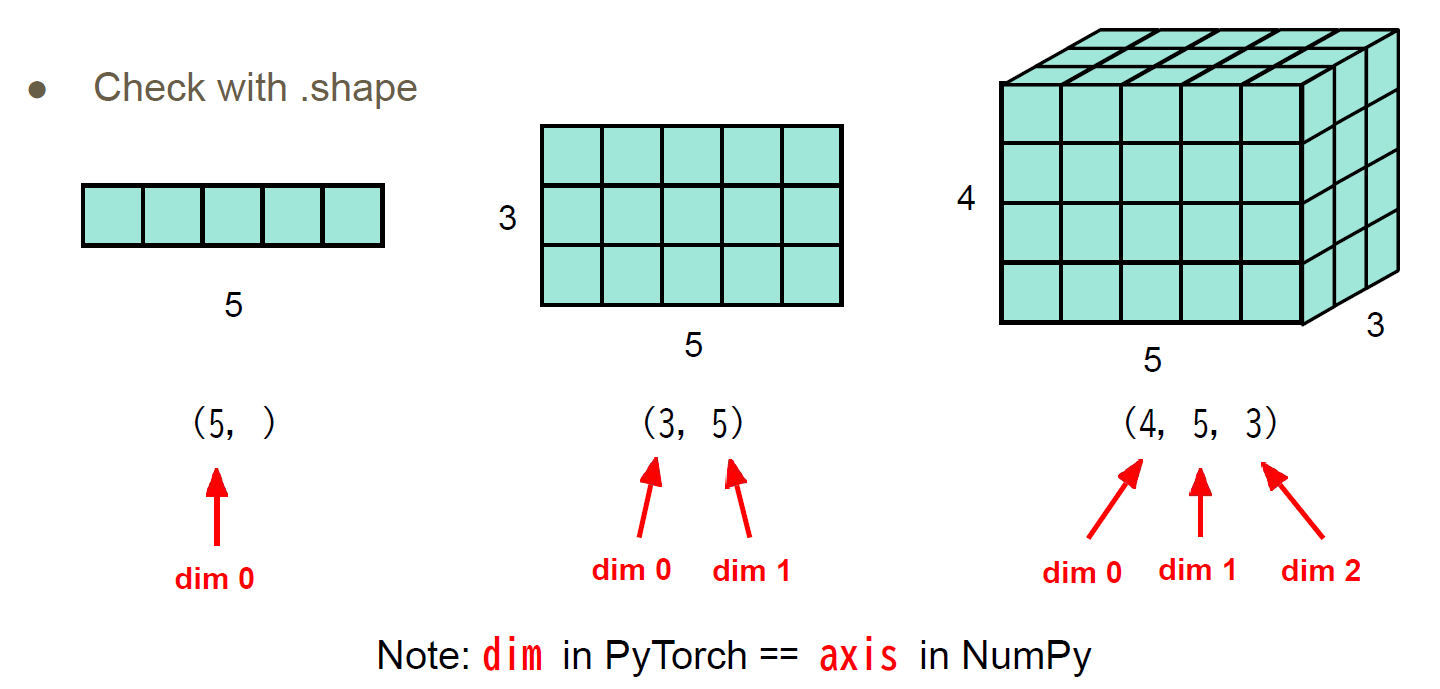


In [ ]:
print(f"Shape of ones tensor {x_ones.shape}")

Shape of ones tensor torch.Size([2, 2])


In [ ]:
import torch
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9641, 0.9354, 0.6010],
        [0.5052, 0.9835, 0.6805]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


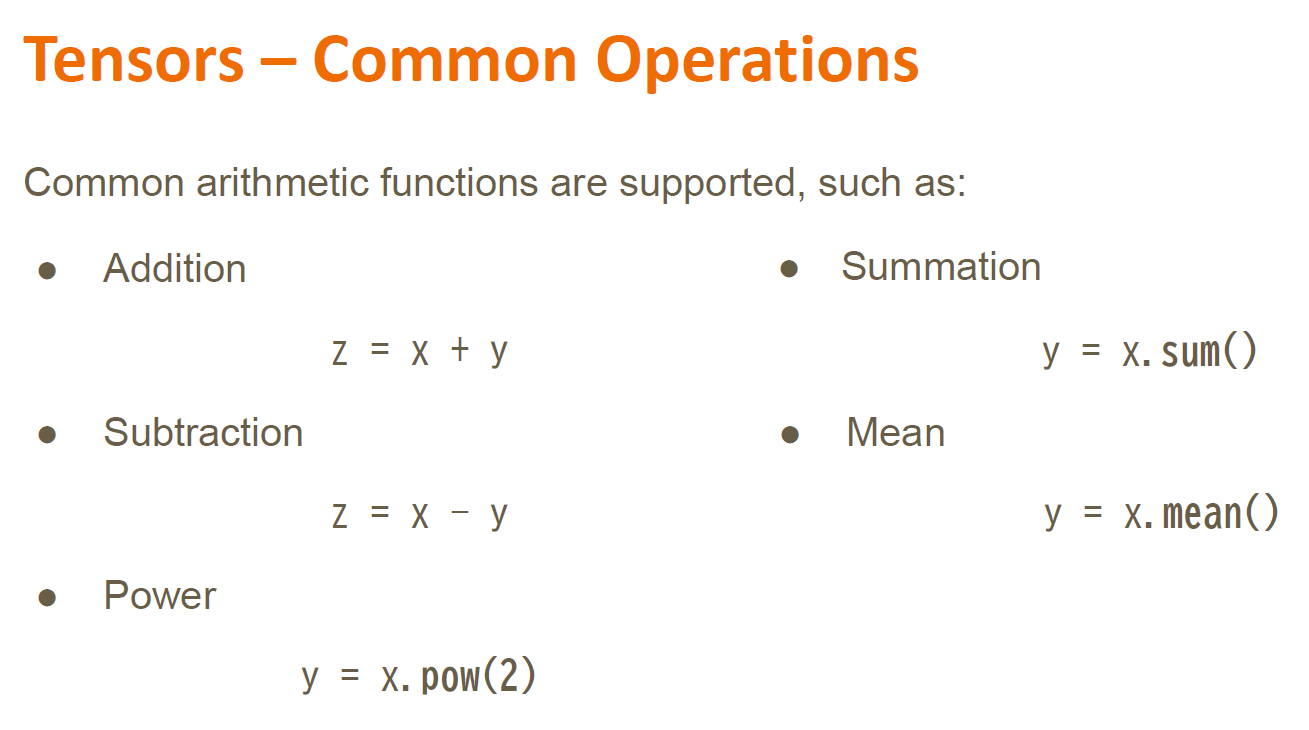

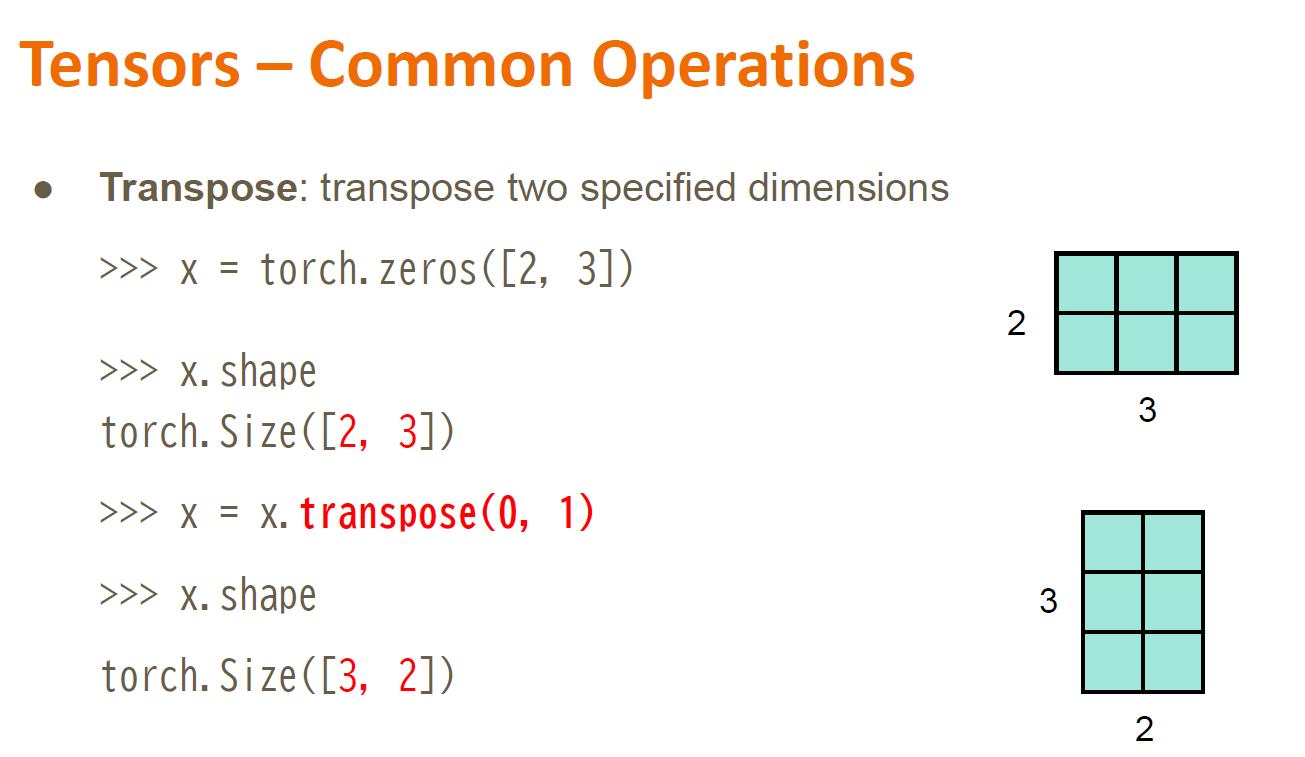

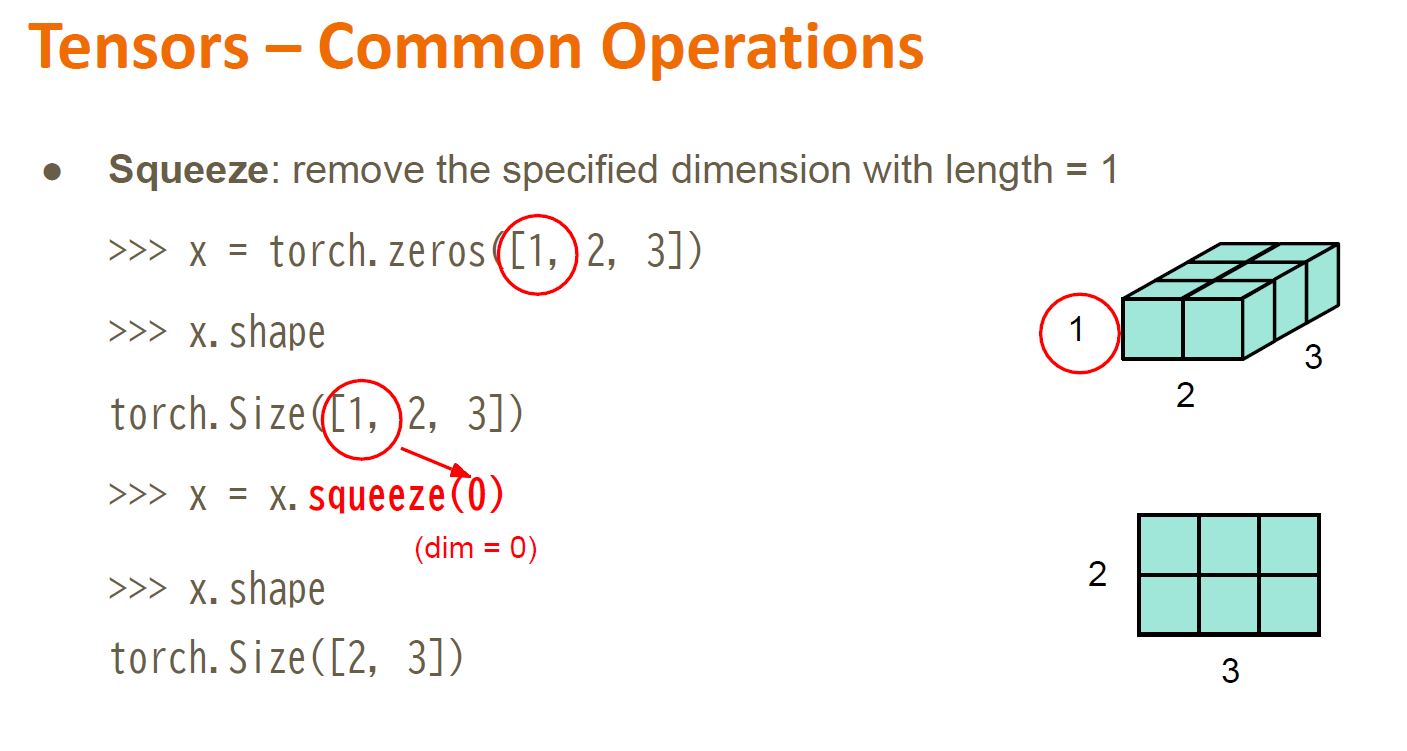

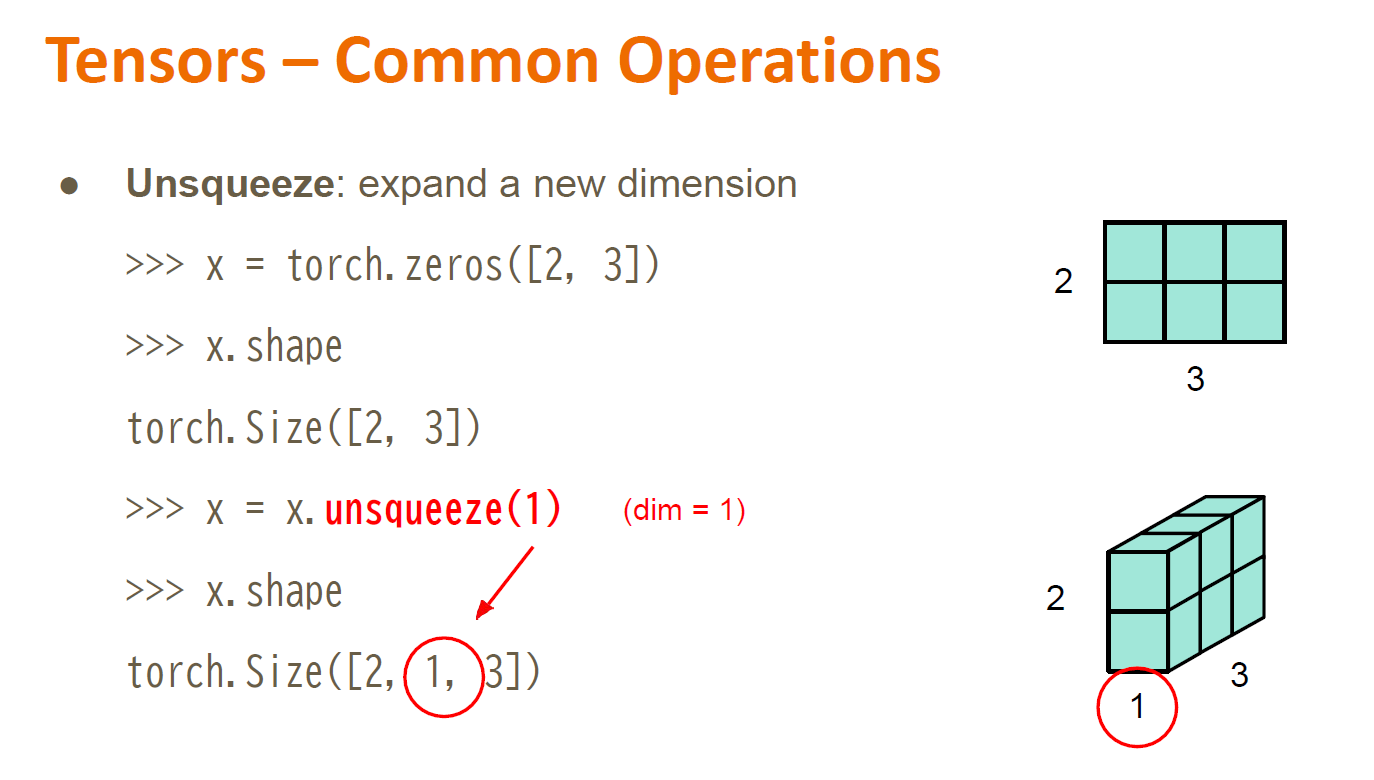

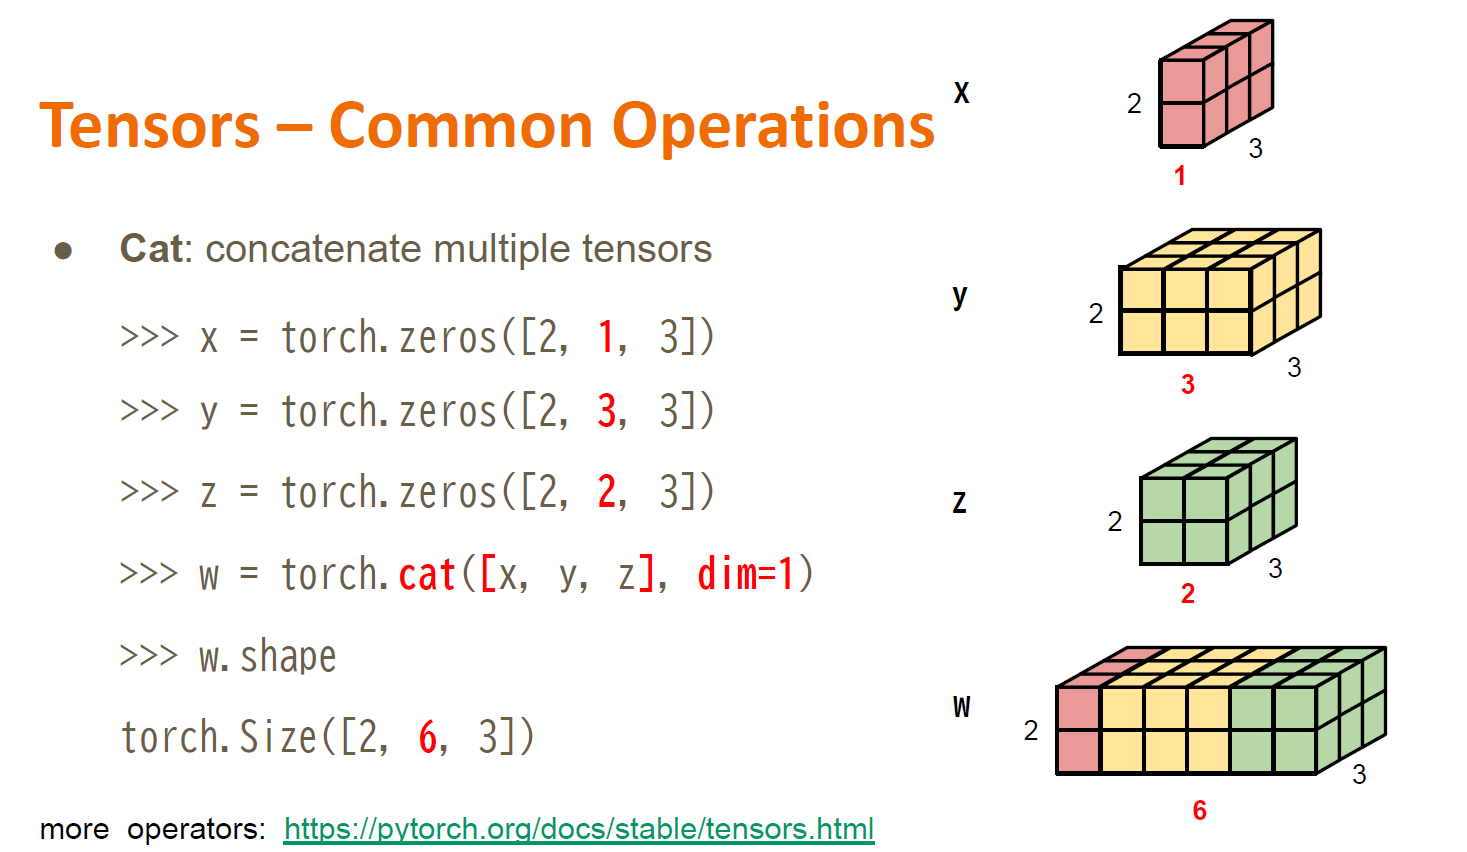

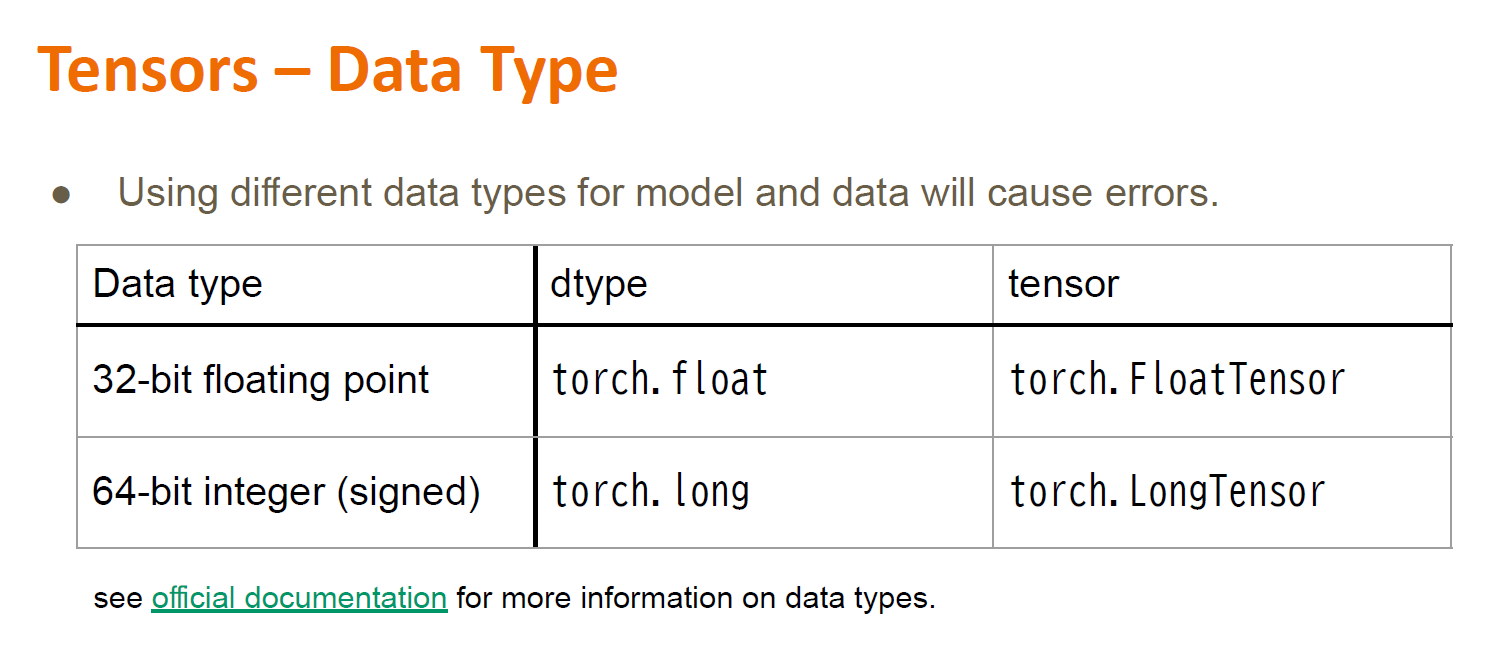

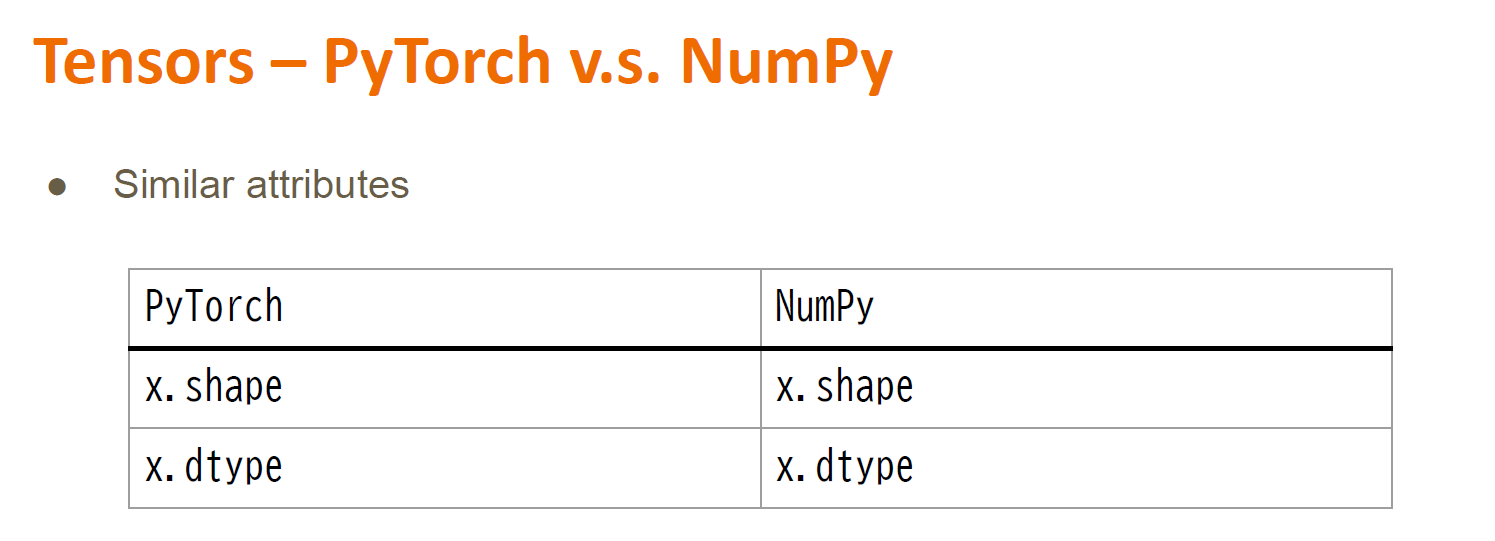

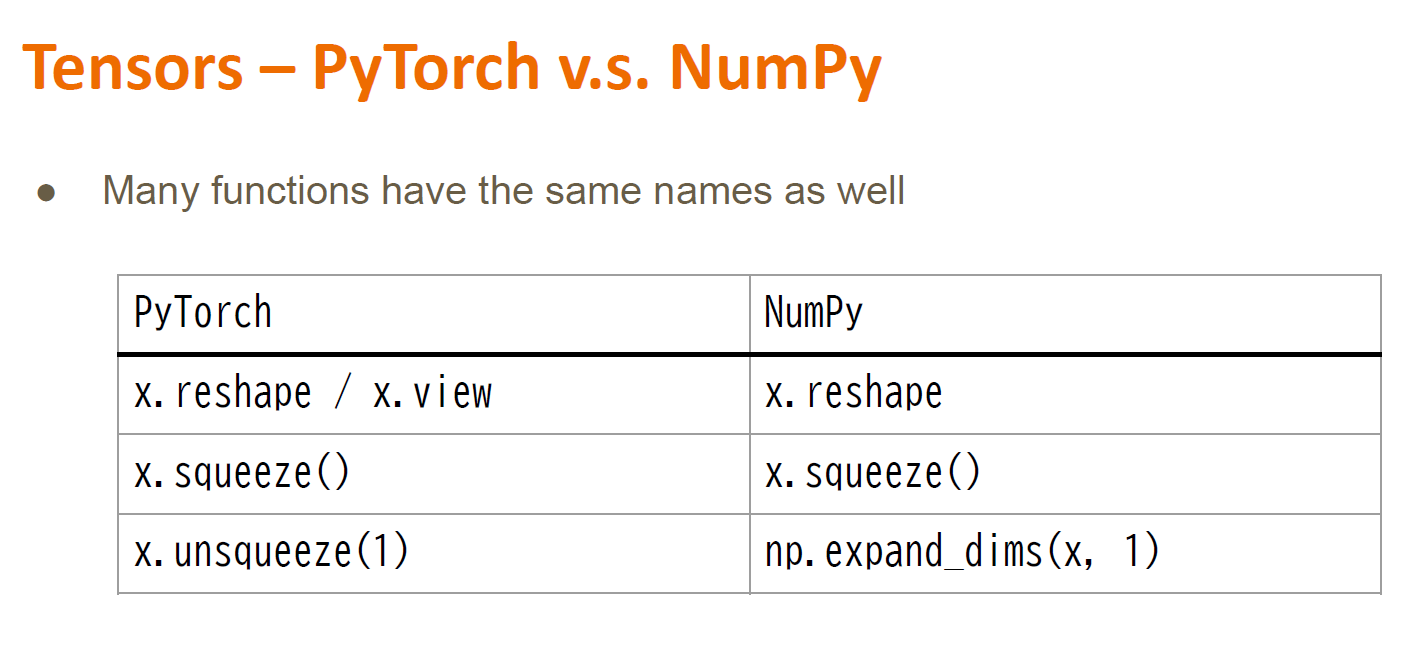

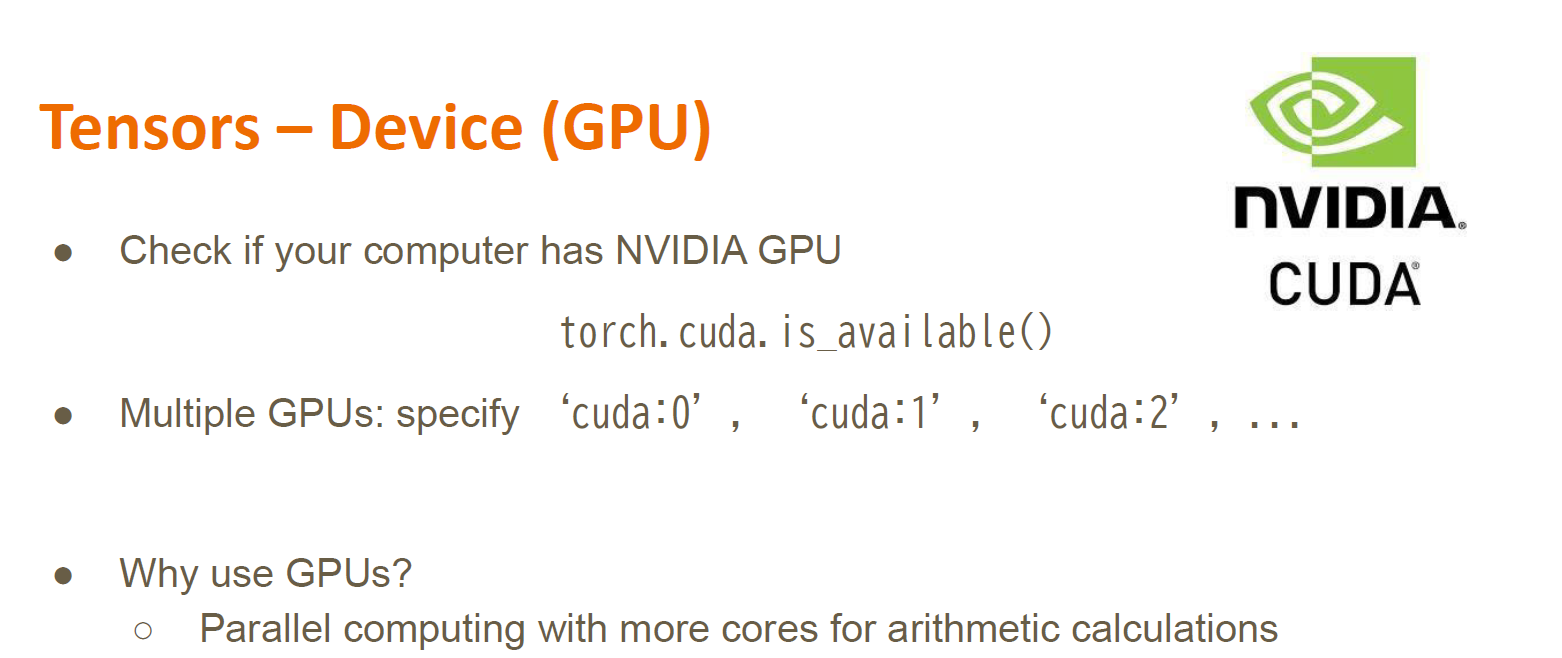

In [ ]:
import torch
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

# We move our tensor to the current accelerator if available
if torch.accelerator.is_available():
    tensor = tensor.to(torch.accelerator.current_accelerator())
    print("\nAccelerator available")
print(tensor.device)

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu

Accelerator available
cuda:0


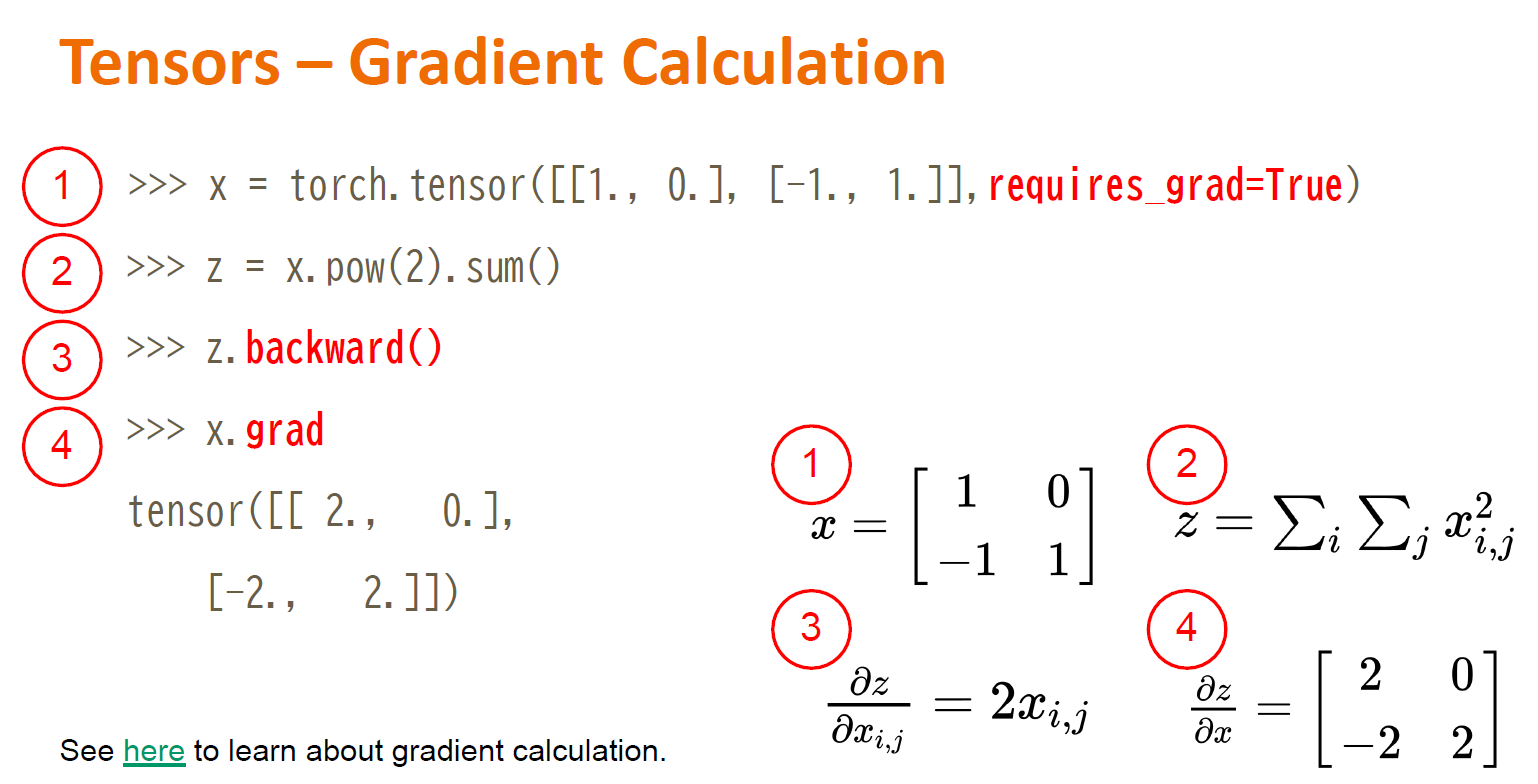

# Creating Nueral Network Models, Loss Functions using Pytorch "torch.nn" module

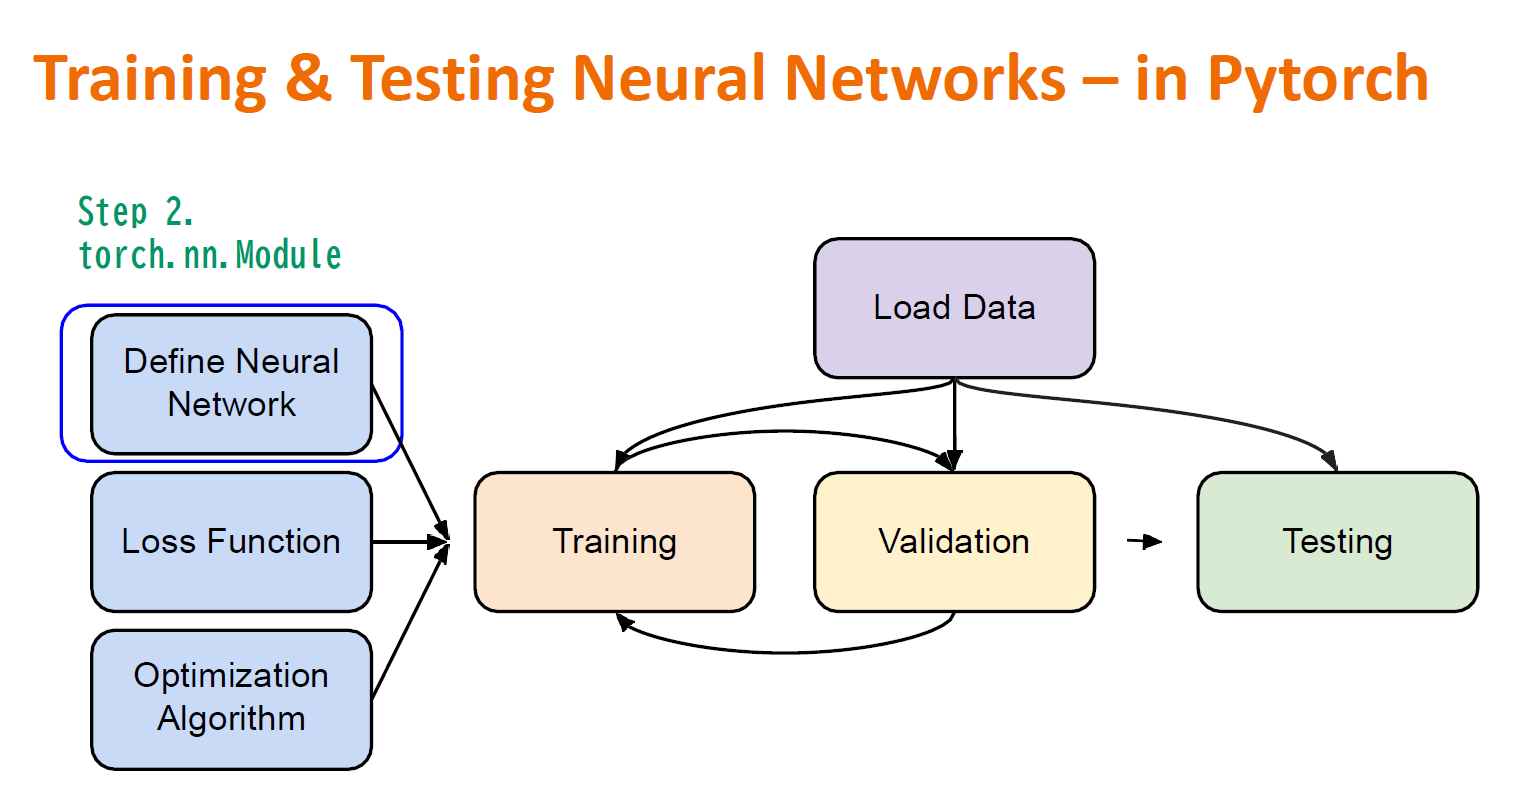

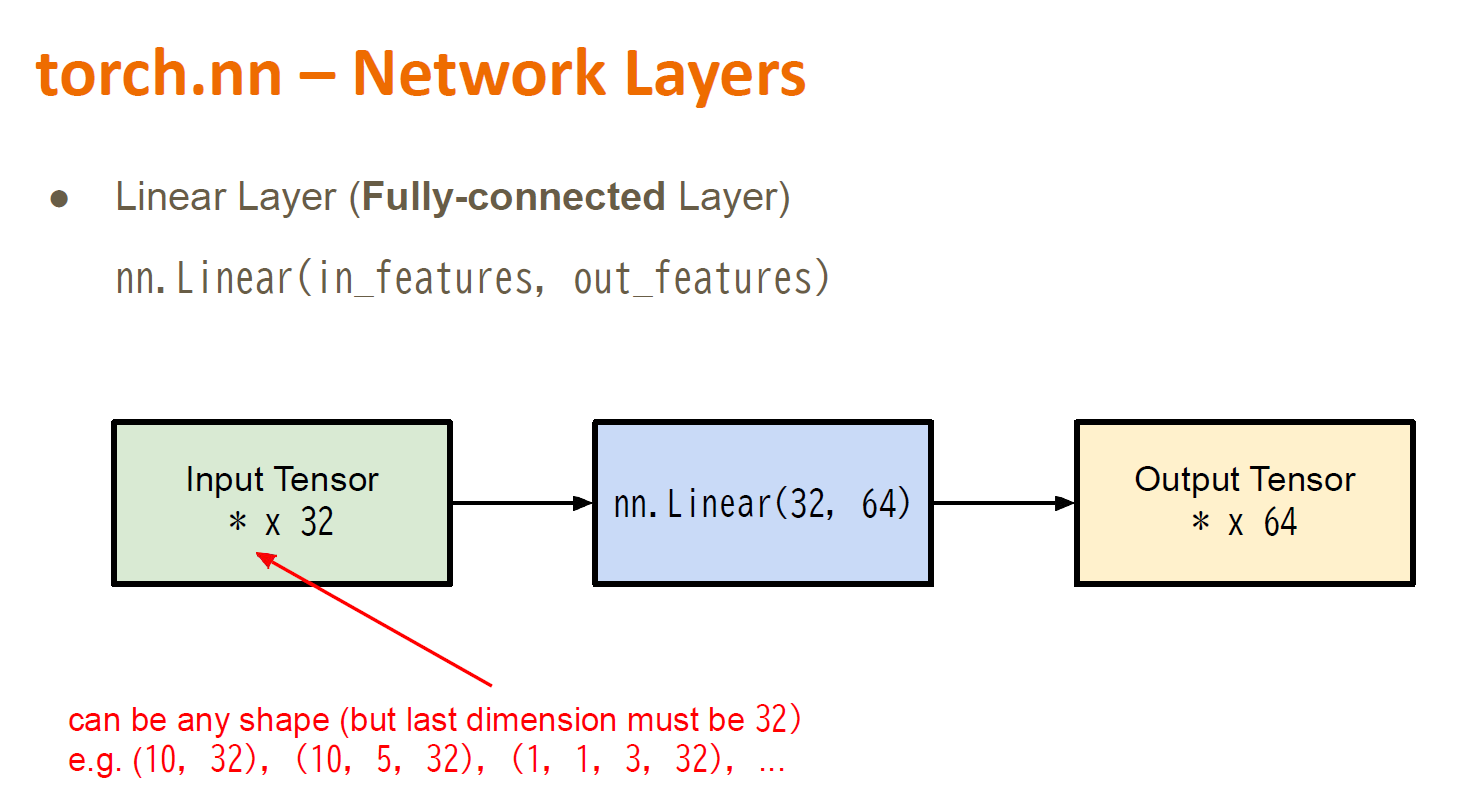

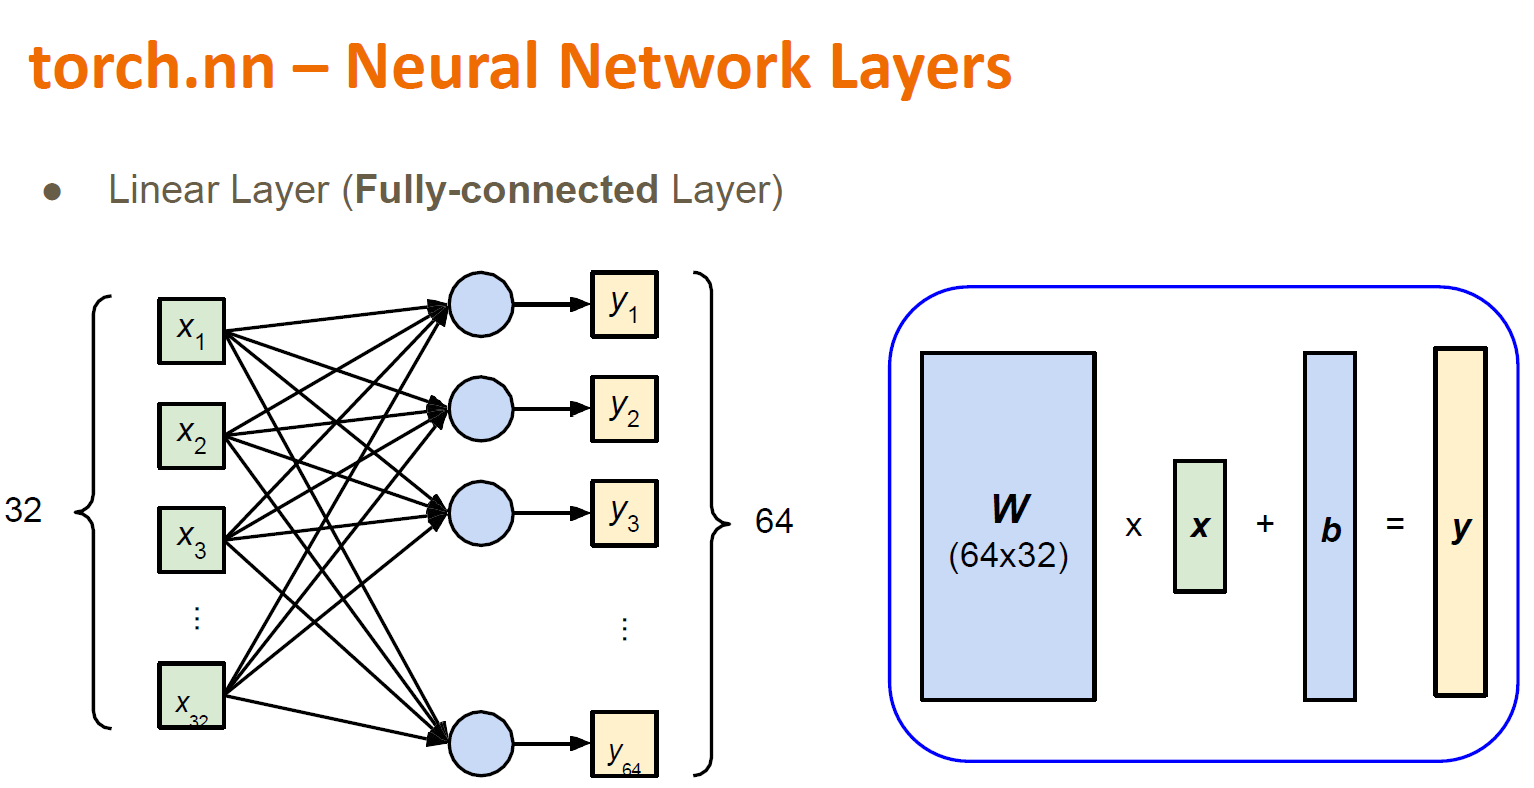

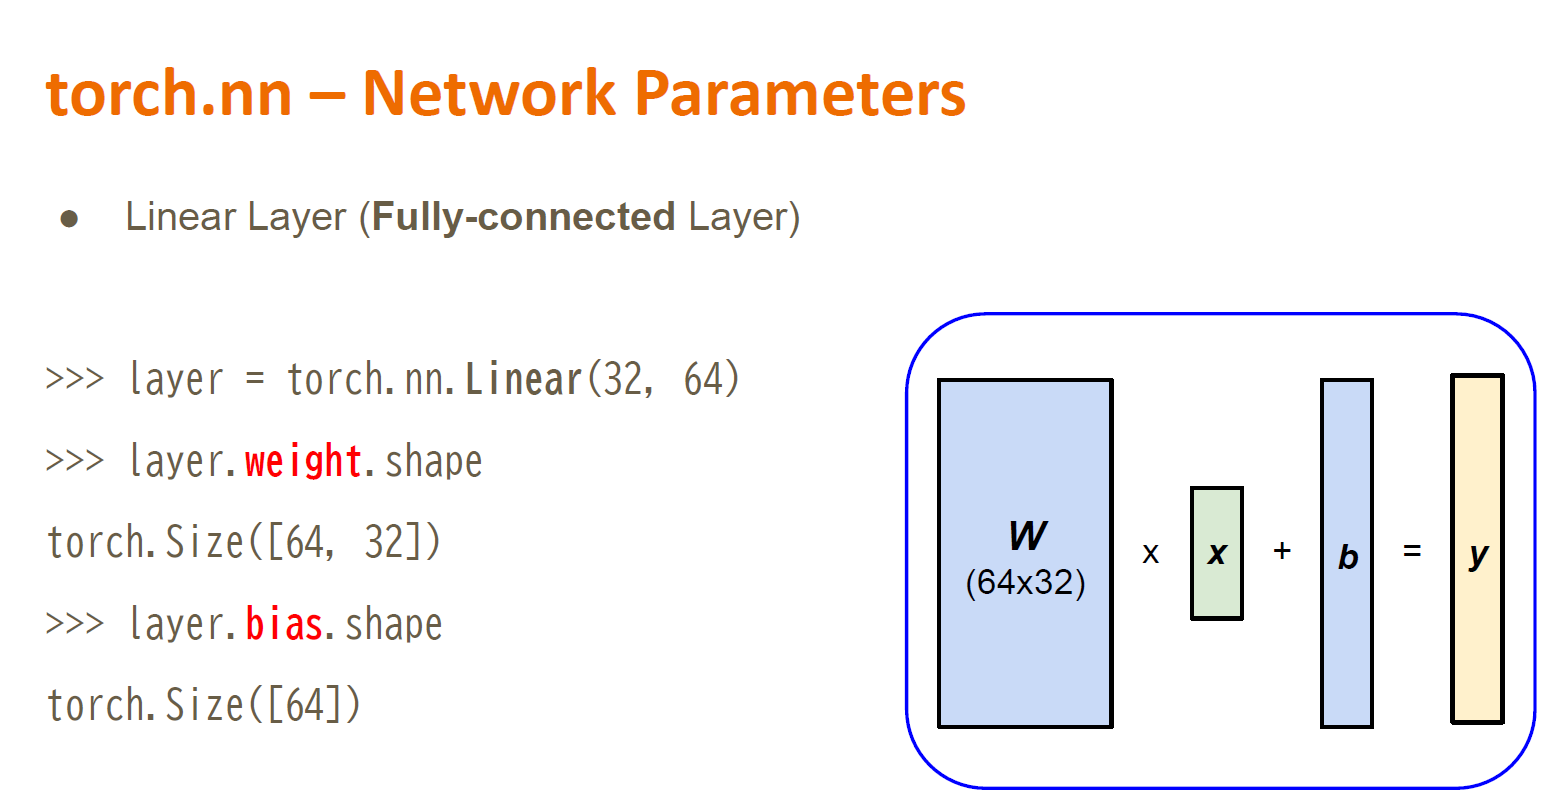

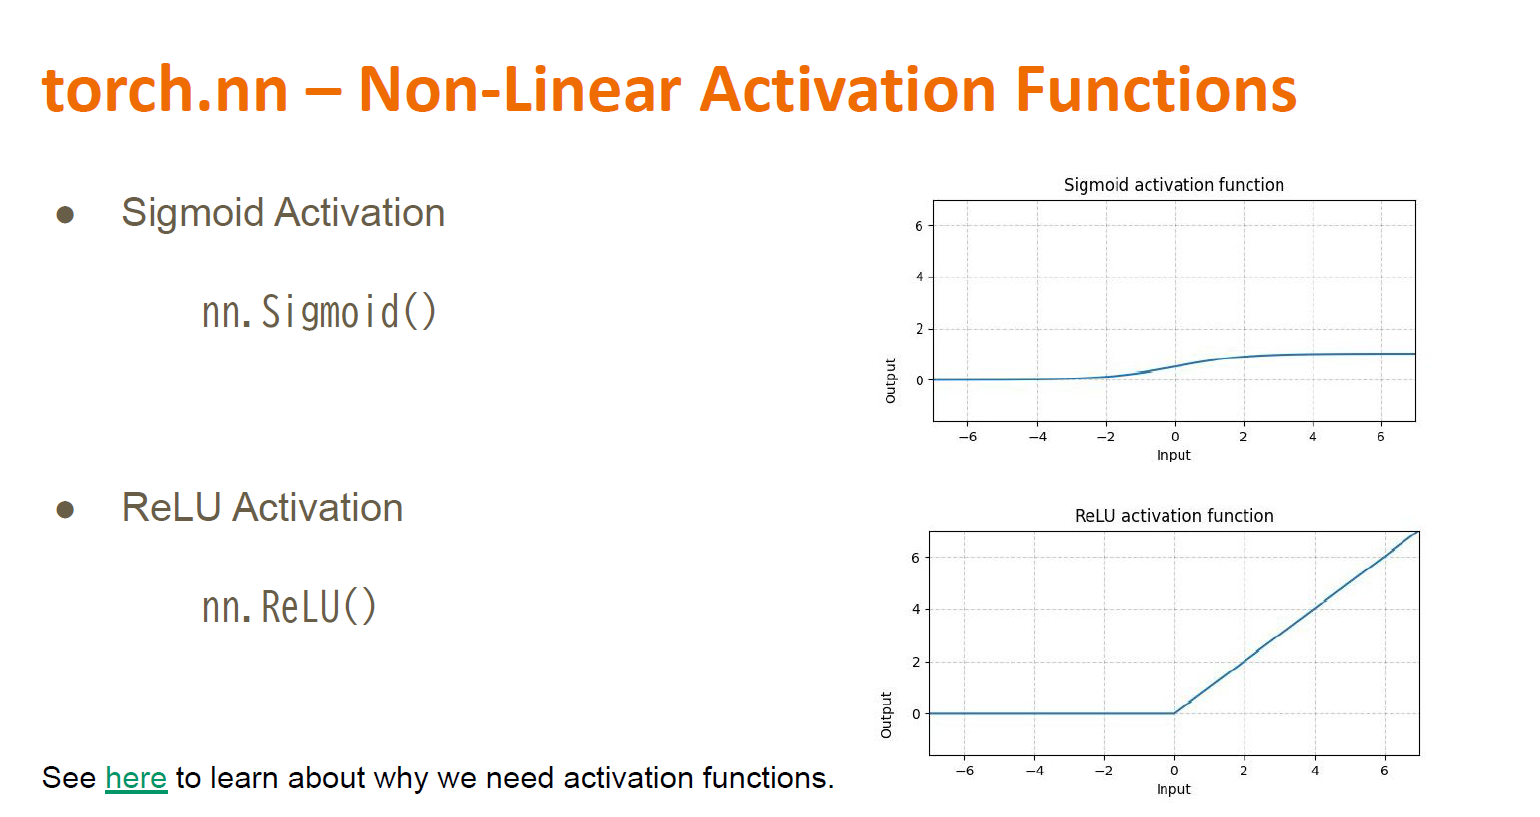

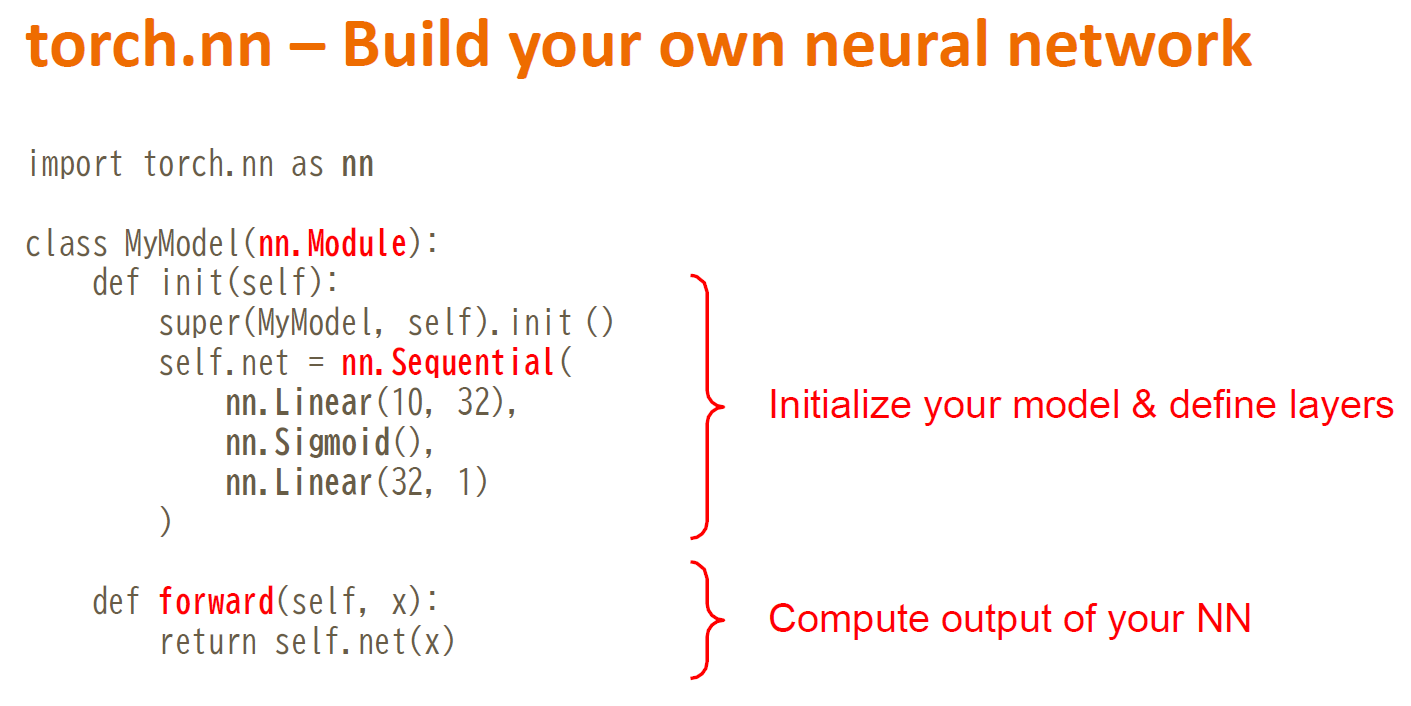

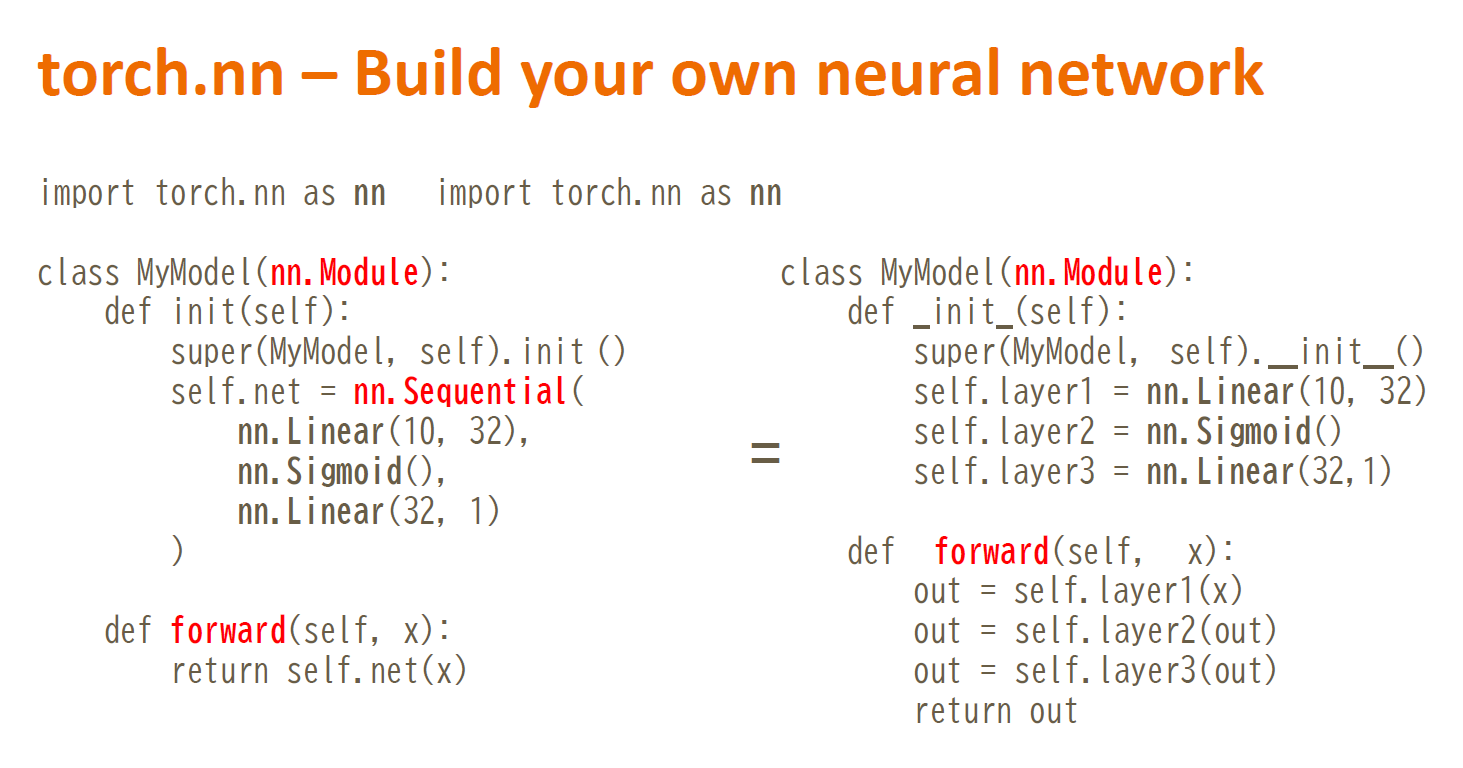

In [ ]:
# Check if a hardware accelerator (GPU/TPU) is available, otherwise fall back to CPU
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

# Define a simple feedforward neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        # Flatten layer converts each 28x28 image into a 1D vector of size 784
        self.flatten = nn.Flatten()

        # Define a stack of fully connected (Linear) layers with ReLU activations
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),  # First hidden layer: input 784 → output 512
            nn.ReLU(),              # Non-linearity
            nn.Linear(512, 512),    # Second hidden layer: 512 → 512
            nn.ReLU(),              # Non-linearity
            nn.Linear(512, 10)      # Output layer: 512 → 10 (one for each class)
        )

    # Define forward pass (how data flows through the network)
    def forward(self, x):
        x = self.flatten(x)                # Flatten the input image
        logits = self.linear_relu_stack(x) # Pass through linear + ReLU layers
        return logits                      # Return raw class scores (logits)

# Create the model instance and move it to the selected device (CPU/GPU)
model = NeuralNetwork().to(device)
print(model)  # Print model architecture


Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


# Optimising Models using Pytorch "torch.optim" module

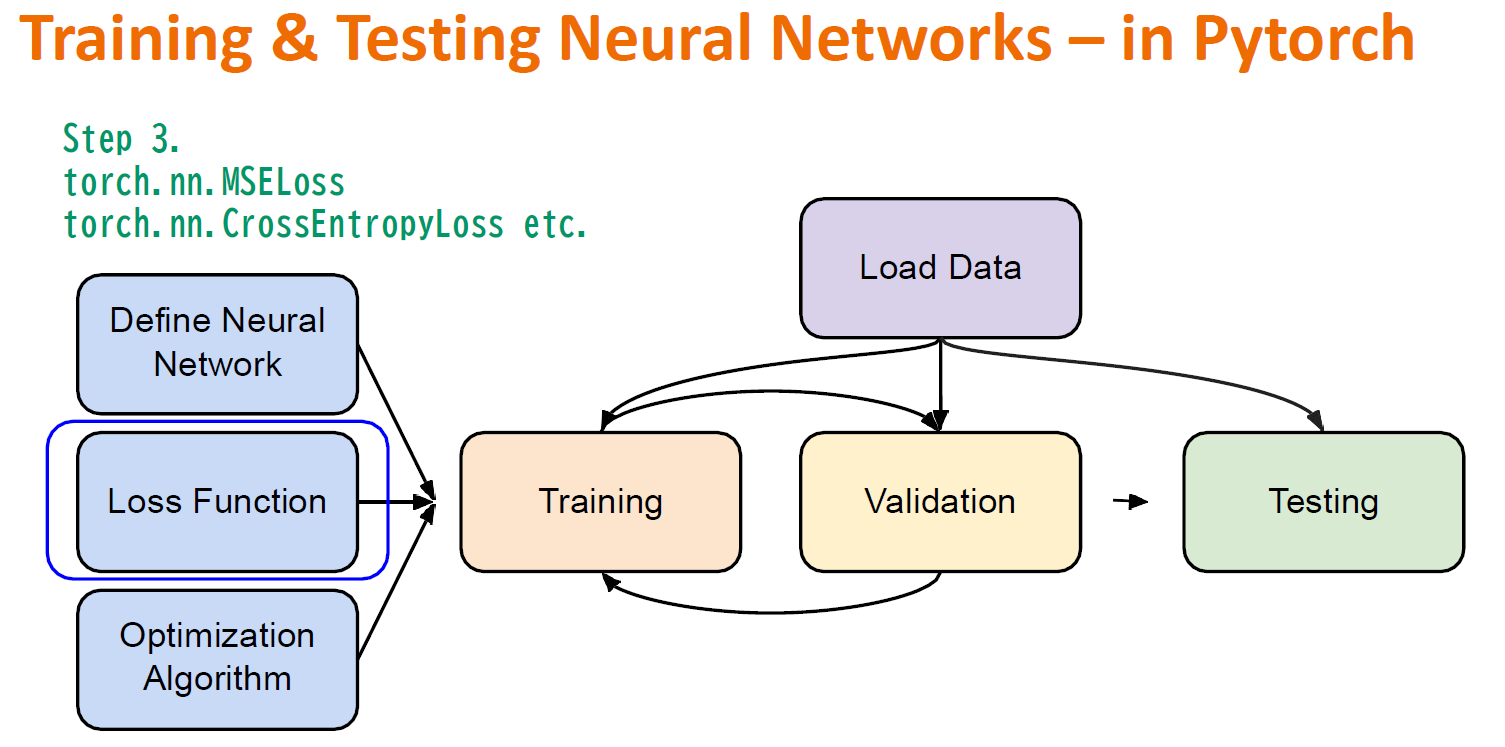

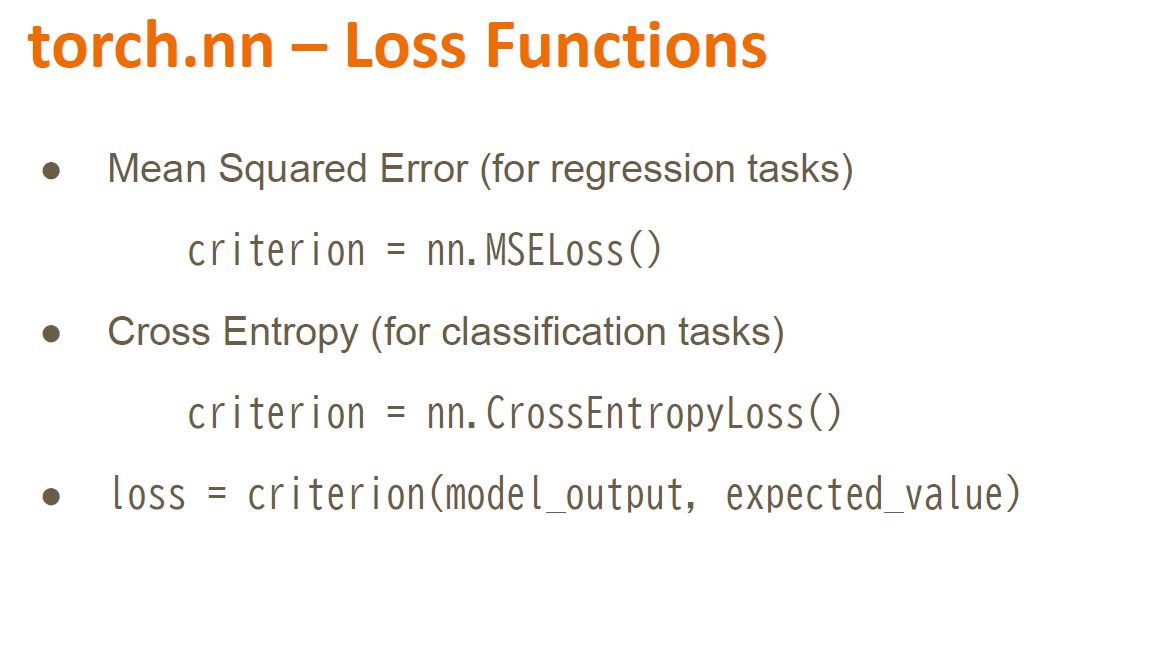

Links for reading on cross entropy and MSE loss:
Cross Entropy: https://www.datacamp.com/tutorial/the-cross-entropy-loss-function-in-machine-learning

Criterions Extended https://nn.readthedocs.io/en/latest/criterion/

In [ ]:
loss_fn = nn.CrossEntropyLoss()



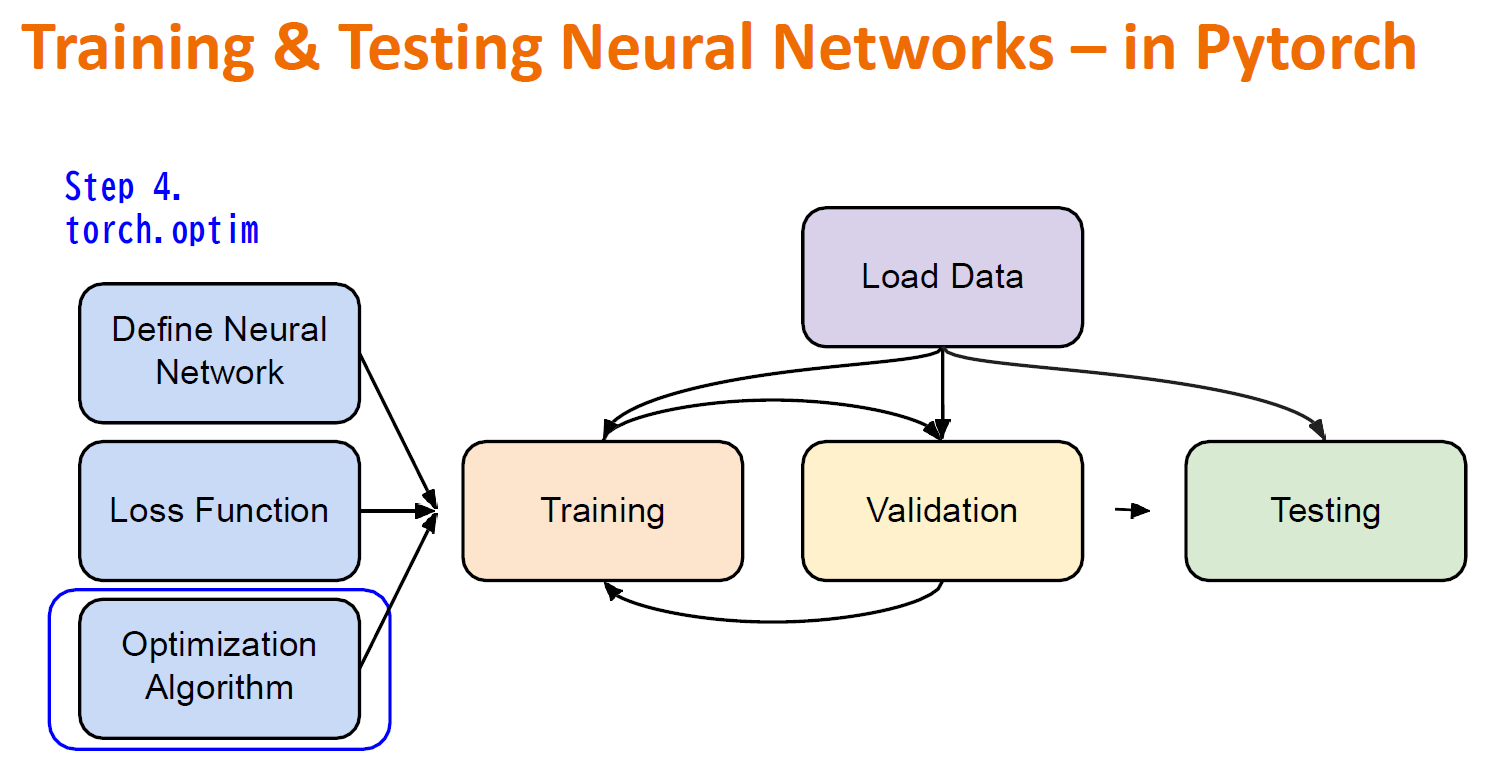

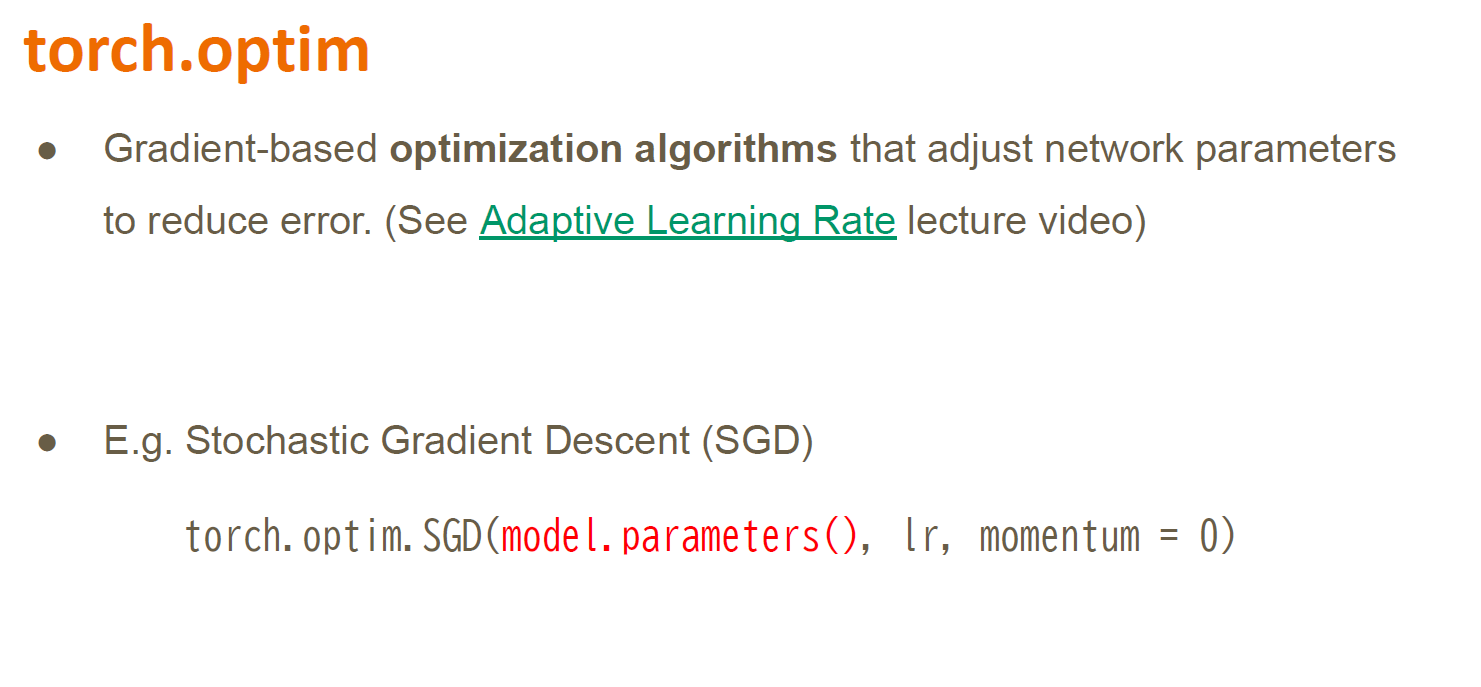

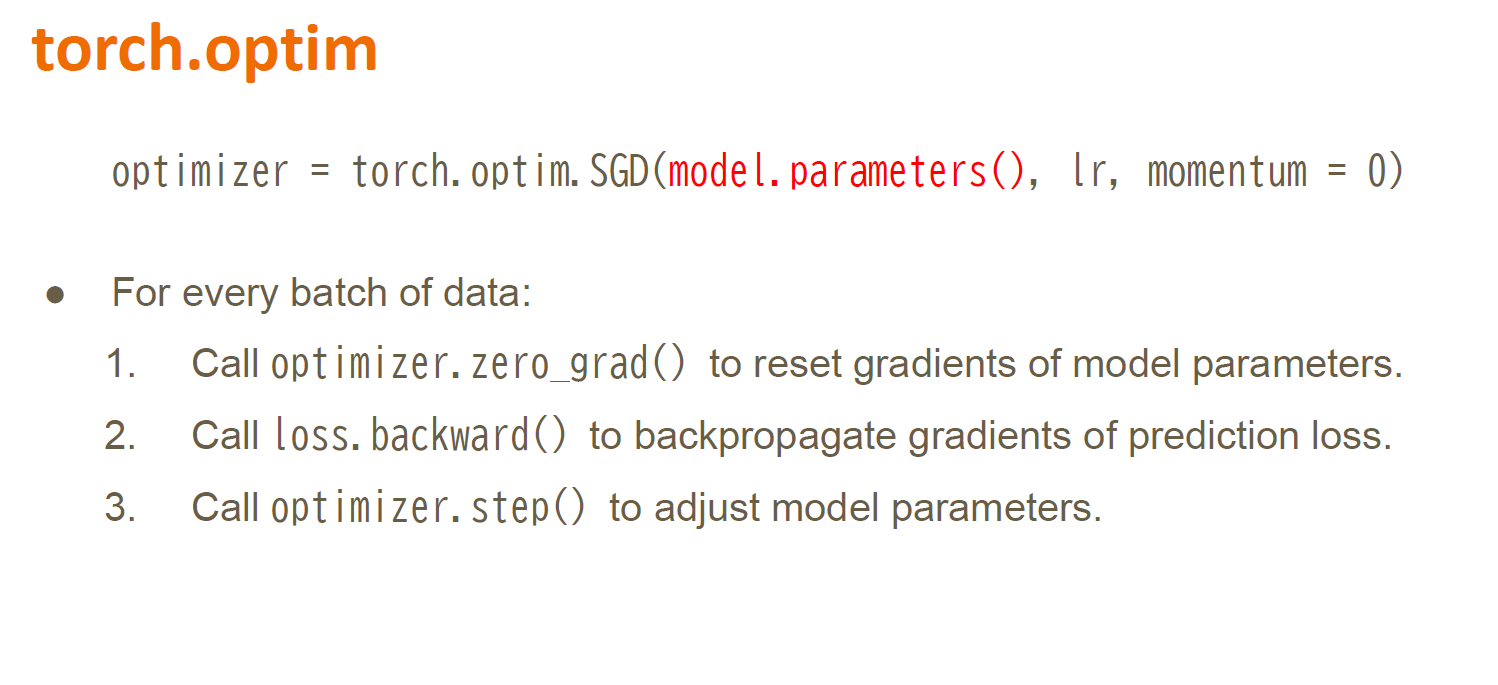

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

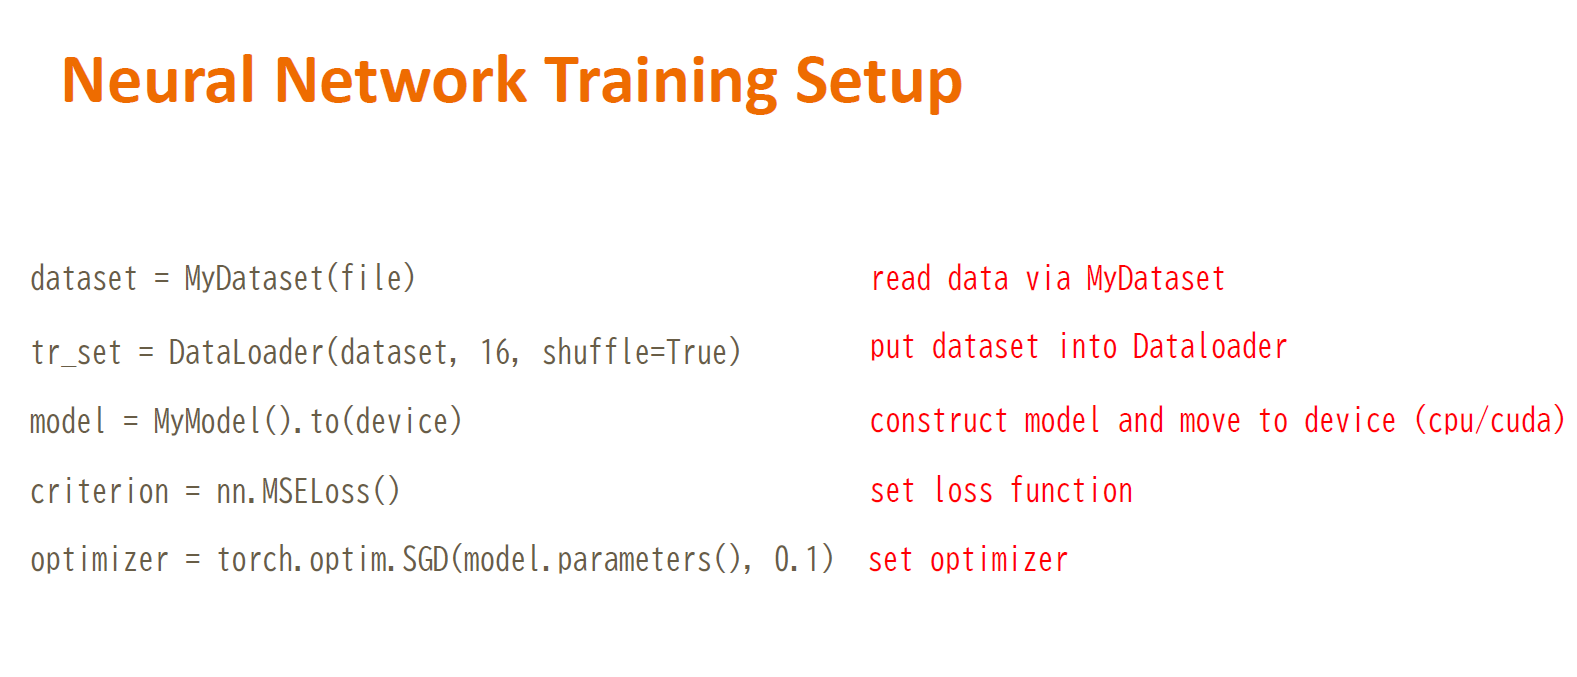

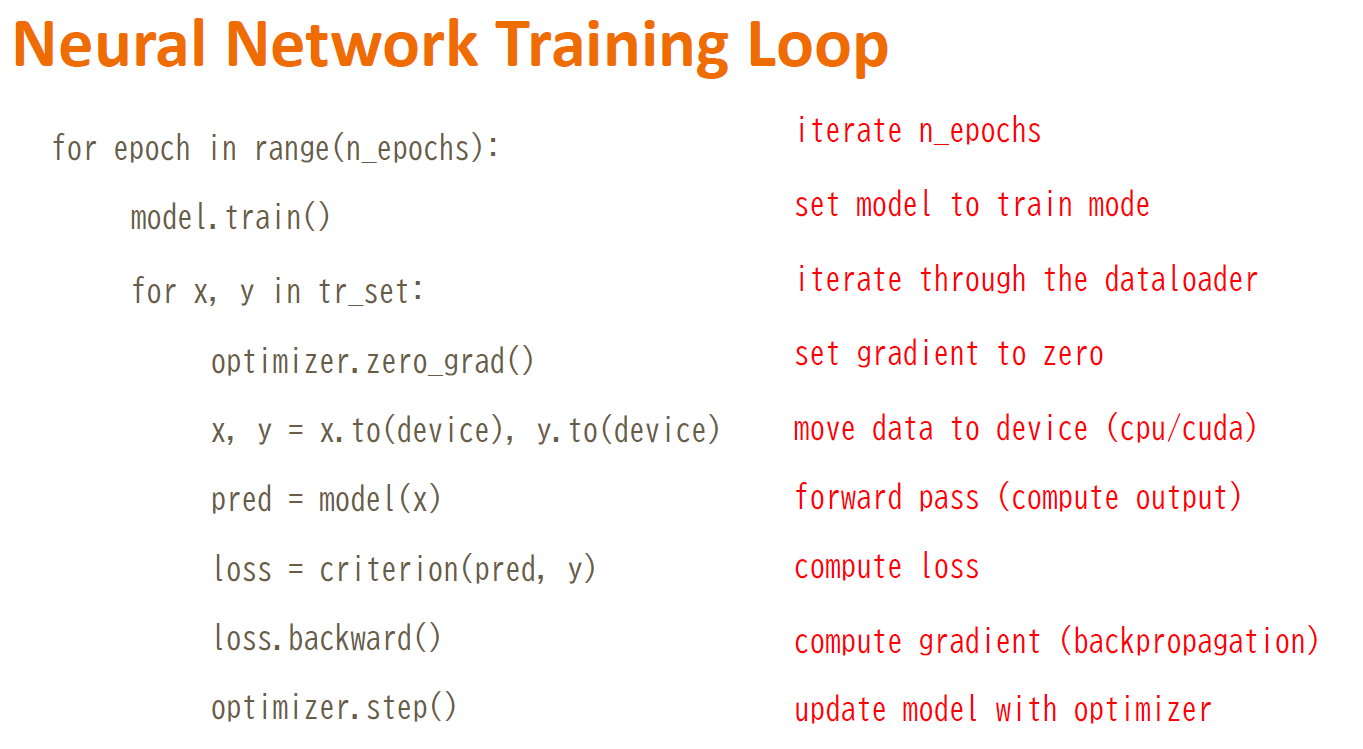

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

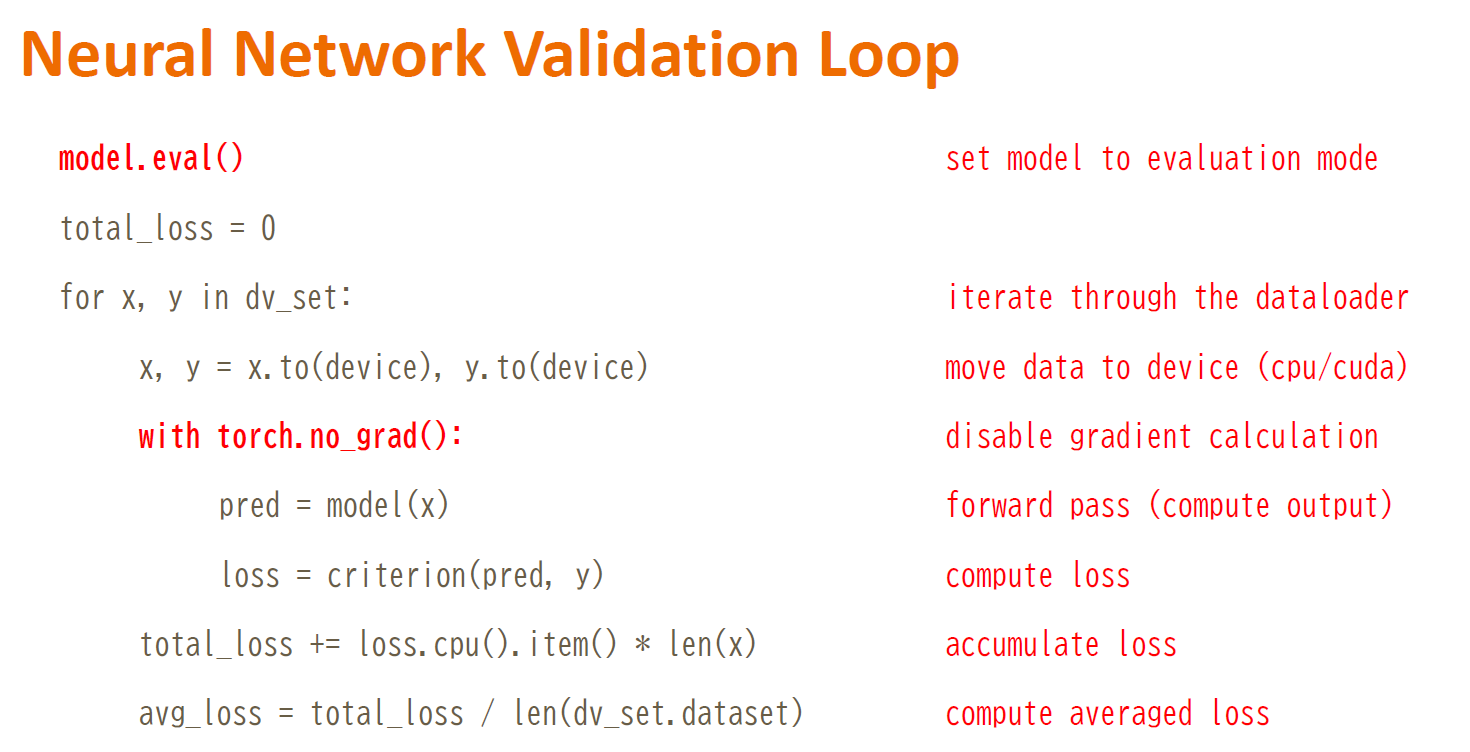

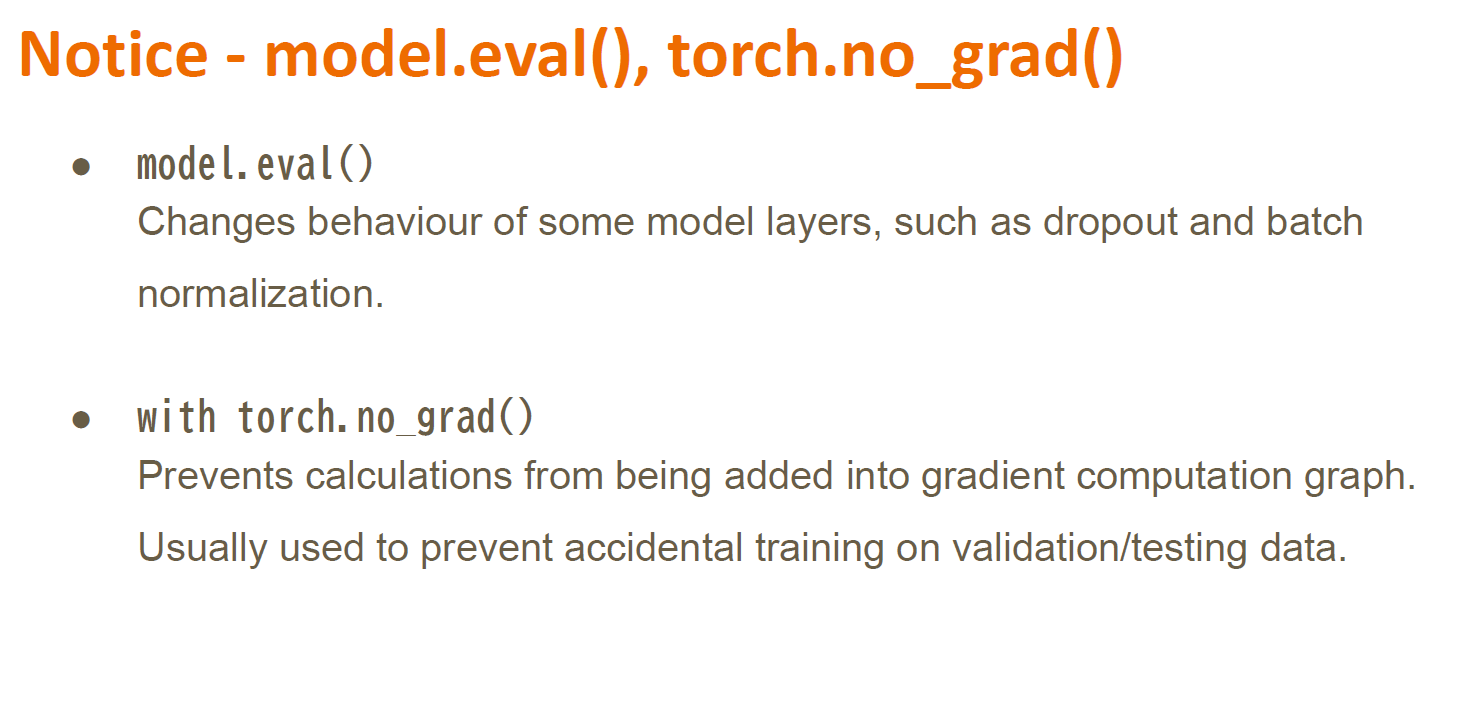

We also check the model’s performance against the test dataset to ensure it is learning.

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


The training process is conducted over several iterations (epochs). During each epoch, the model learns parameters to make better predictions. We print the model’s accuracy and loss at each epoch; we’d like to see the accuracy increase and the loss decrease with every epoch.

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.289808  [   64/60000]
loss: 2.278639  [ 6464/60000]
loss: 2.266977  [12864/60000]
loss: 2.266585  [19264/60000]
loss: 2.241668  [25664/60000]
loss: 2.210362  [32064/60000]
loss: 2.223703  [38464/60000]
loss: 2.185744  [44864/60000]
loss: 2.177814  [51264/60000]
loss: 2.155825  [57664/60000]
Test Error: 
 Accuracy: 38.0%, Avg loss: 2.143795 

Epoch 2
-------------------------------
loss: 2.147456  [   64/60000]
loss: 2.133346  [ 6464/60000]
loss: 2.084262  [12864/60000]
loss: 2.106224  [19264/60000]
loss: 2.048928  [25664/60000]
loss: 1.986019  [32064/60000]
loss: 2.018401  [38464/60000]
loss: 1.937884  [44864/60000]
loss: 1.936856  [51264/60000]
loss: 1.867915  [57664/60000]
Test Error: 
 Accuracy: 54.8%, Avg loss: 1.864671 

Epoch 3
-------------------------------
loss: 1.893431  [   64/60000]
loss: 1.856418  [ 6464/60000]
loss: 1.750384  [12864/60000]
loss: 1.796238  [19264/60000]
loss: 1.683001  [25664/60000]
loss: 1.633373  [32064/600

# Saving and Loading Models

A common way to save a model is to serialize the internal state dictionary (containing the model parameters).

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


The process for loading a model includes re-creating the model structure and loading the state dictionary into it.

In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

This model can now be used to make predictions.

Predicted: "Ankle boot", Actual: "Ankle boot"


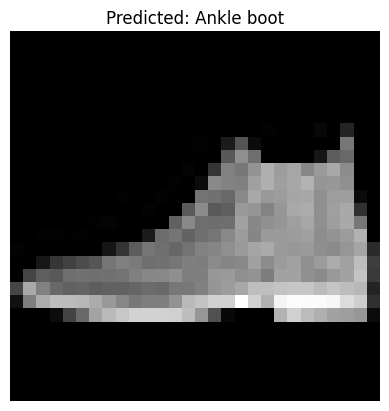

In [ ]:
import matplotlib.pyplot as plt

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Set model to evaluation mode
model.eval()

# Take the first test sample (image + label)
x, y = test_data[0][0], test_data[0][1]

with torch.no_grad():
    # Add batch dimension since model expects input of shape [batch_size, channels, height, width]
    x_input = x.unsqueeze(0).to(device)

    # Forward pass
    pred = model(x_input)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]

    print(f'Predicted: "{predicted}", Actual: "{actual}"')

    # Plot the image
    plt.imshow(x.squeeze(), cmap="gray")  # remove channel dimension and plot in grayscale
    plt.title(f'Predicted: {predicted}')
    plt.axis("off")
    plt.show()


# Pytorch Documentation & Other Resources

Pytorch Tutorial https://docs.pytorch.org/tutorials/
3 Blue 1 Brown: https://www.youtube.com/watch?v=IHZwWFHWa-w
Python: https://www.w3schools.com/python/